# Introduction


L'idée du sujet de notre projet est venue de l'opinion selon laquelle une économie florissante (croissance du PIB) est souvent associée à la notion de préjudice climatique. Le principe qui voudrait que les émissions d'un pays augmentent avec son économie semblait admis. Or, à la suite de plusieurs recherches sur le sujet, nous sommes tombées sur un constat interpellant: les émissions de CO2 du Danemark ont baissé de 36% depuis 1990, tout en maintenant une croissance du PIB. De là est née notre interrogation sur la possibilité d'un découplage entre croissance et péril climatique. Précisément, le cas du Danemark serait-il une simple exception à la règle ? Entre 1990 et 2019, le pays à diminué ses émissions de CO2 de 47% par tête, c'est-à-dire qu'elles ont quasiment été divisées par 2. Parallèlement, nous avons observé qu'au cours de cette période, l'économie danoise a continué de croître de manière régulière. Nous nous appuyons ici sur un rapport publié par l'OCDE "OECD Economic Surveys: Denmark 2021". De plus, la part des énergies renouvelables dans la production énergétique a continué à augmenter. Au total, le Danemark se place ainsi comme l'un des pays les moins pollueurs en matière de CO2.

La cas du Danemark nous semble ainsi pertinent, d’autant que le pays a mis en œuvre entre 1976 et 1981 plusieurs plans, dont le Energy Plan 81, qui ont permis un changement de paradigme rapide, permettant l’essor des renouvelables et de la cogénération. Le pays a depuis intensifié sa planification écologique, le propulsant vers une révolution renouvelable.


Partant de ces constats saisissants, il nous a semblé intéressant de mettre en relief 3 variables que nous utiliserons au cours de notre projet (que nous avons, pour les variables qui ne sont pas déjà en variation, converties en logarithmes naturels pour pouvoir les interpréter en termes de croissance):

1. Le PIB (current US $) : afin d’évaluer la production de biens et services du Danemark pendant une année. Il illustre l'importance de l'activité économique du pays étudié. Cependant, il faut garder à l’esprit que la valeur du PIB en dollars courants peut être trompeuse de plusieurs manières, en particulier lors de comparaisons entre deux ou plusieurs années. D'abord, parce qu'elle peut être gonflée à cause de l'inflation (ou l'inverse à cause de la déflation). Il est aussi utile d'examiner le même indicateur par habitant. Enfin, pour des comparaisons internationales plus adéquates on doit examiner la donnée formulée en PPA (parité pouvoir d'achat).

2. Les émissions de CO2 (tonnes produites) : Ces chiffres sont basés sur la « production » ou les émissions « territoriales » (c'est-à-dire les émissions provenant de la combustion de combustibles fossiles ou de la production de ciment à l'intérieur des frontières d'un pays). Il ne prend pas en compte les émissions des biens échangés (émissions basées sur la consommation). Ces chiffres portent spécifiquement sur les émissions de CO 2 et non sur les émissions totales de gaz à effet de serre. Rappelons que les émissions annuelles peuvent être largement influencées par la taille de la population. De plus, lorsque nous examinons uniquement les émissions produites aujourd’hui, nous ne parvenons pas à reconnaître la responsabilité historique des émissions des dernières décennies ou siècles. Il peut ainsi être pertinent d’utiliser les émissions cumulées de CO 2 – la somme des émissions produites depuis une date donnée jusqu'à aujourd’hui, pour comprendre quelle part des émissions totales de CO 2 à ce jour a été émise par un pays donné.

3. La contribution des énergies renouvelables à l'approvisionnement total en énergie primaire (millier de tonnes équivalent pétrole), avec l'approvisionnement en énergie primaire qui englobe la totalité de la production énergétique et des importations, déduisant les exportations ainsi que les soutes internationales, tout en étant ajusté en fonction des variations de stocks. Nous devons spécifier que le terme « énergies renouvelables » désigne la part de ces énergies dans les approvisionnements totaux en énergie primaire (ATEP). Les données indiquent notamment, en équivalent énergie primaire, les productions hydroélectrique (hors stations de pompage), géothermique, solaire, éolienne, marémotrice et houlomotrice ; ainsi que l'énergie tirée de biocombustibles solides, bioessence, biogazole, autres biocarburants, biogaz et déchets municipaux renouvelables. Les biocombustibles sont directement ou indirectement dérivés de la biomasse (matière organique vivante ou fraîche) et comprennent le bois, les déchets végétaux (dont déchets de bois et cultures énergétiques), l'éthanol, les matières/déchets d'origine animale et les lessives sulfitiques. Les déchets municipaux sont ceux des secteurs résidentiel, tertiaire et services publics, collectés par les municipalités pour élimination dans une installation centralisée en produisant chaleur et/ou électricité. L’intérêt de cette variable dans notre projet réside dans le fait que la transition vers les énergies renouvelables est souvent associée à une réduction des émissions de CO2, et que les pays qui investissent dans les énergies renouvelables peuvent réduire leur dépendance aux énergies fossiles, réduisant ainsi les émissions. D’autant plus que le Danemark est souvent cité comme un exemple de transition réussie vers les énergies renouvelables.


Le 3 séries temporelles que nous avons établies selon des sources fiables consultables sont disponibles pour la même période (1970-2021) et la même fréquence d’observation (annuelle). Nous avons bien un minimum de 50 observations afin d'obtenir des estimations suffisamment précises.

Pour résumer, le premier objectif est d′examiner comment sont reliées les variables dans le long terme. Le second est d′examiner les relations de causalité dynamique entre ces variables. Finalement, nous tenterons de mettre nos résultats en lumière à l'aide de littérature déjà existante.

# Partie 1 : Modélisations univariées

In [ ]:
install.packages("lubridate")
install.packages("TT")
install.packages("quantmod")
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘Rcpp’, ‘lazyeval’, ‘httpuv’, ‘crosstalk’, ‘promises’, ‘DT’, ‘data.tree’, ‘htmlwidgets’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
datadenmark<-read.csv2("/content/Projet_econometrie_Danemark.csv",dec=".",col.names = c('annees','emCO2','log(emCO2)','var_emCO2','PIB','log(PIB)','var_PIB','CERp','log(CERp)','var_CERp','ouv_eco','log(ouv_eco)','var_ouv_eco'))
print(datadenmark)

   annees    emCO2 log.emCO2. var_emCO2             PIB log.PIB. var_PIB
1    1970 62039320       7.79            17075457585,00    10.23        
2    1971 57009548       7.76     -8,11  19085633673,00    10.28   11,77
3    1972 59594060       7.78      4,53  23232407815,00    10.37   21,73
4    1973 59222050       7.77     -0,62  30730626668,00    10.49   32,27
5    1974 55041790       7.74     -7,06  34160444804,00    10.53   11,16
6    1975 55744904       7.75      1,28  40474406216,00    10.61   18,48
7    1976 60102740       7.78      7,82  44575708131,00    10.65   10,13
8    1977 61817816       7.79      2,85  49784407636,00    10.70   11,69
9    1978 61096424       7.79     -1,17  60362658215,00    10.78   21,25
10   1979 62978228       7.80      3,08  70366799282,00    10.85   16,57
11   1980 60348444       7.78     -4,18  71127002865,00    10.85    1,08
12   1981 51773060       7.71    -14,21  61878103527,00    10.79     -13
13   1982 53684428       7.73      3,69  6041254258

On vérifie qu'il n'y a pas de données manquantes.

In [ ]:
sapply(datadenmark,function(x) sum(is.na(x)))

annees        emCO2   log.emCO2.    var_emCO2          PIB     log.PIB. 
           0            0            0            0            0            0 
     var_PIB         CERp    log.CERp.     var_CERp      ouv_eco log.ouv_eco. 
           0            0            0            0            0            0 
 var_ouv_eco 
           0

**Commentaires:**
Aucune donnée n'est manquante.

In [ ]:
class(datadenmark)
str(datadenmark)

[1] "data.frame"

'data.frame':	52 obs. of  13 variables:
 $ annees      : int  1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 ...
 $ emCO2       : int  62039320 57009548 59594060 59222050 55041790 55744904 60102740 61817816 61096424 62978228 ...
 $ log.emCO2.  : num  7.79 7.76 7.78 7.77 7.74 7.75 7.78 7.79 7.79 7.8 ...
 $ var_emCO2   : chr  "" "-8,11" "4,53" "-0,62" ...
 $ PIB         : chr  "17075457585,00" "19085633673,00" "23232407815,00" "30730626668,00" ...
 $ log.PIB.    : num  10.2 10.3 10.4 10.5 10.5 ...
 $ var_PIB     : chr  "" "11,77" "21,73" "32,27" ...
 $ CERp        : chr  "319,73" "329,28" "307,48" "307,48" ...
 $ log.CERp.   : num  2.5 2.52 2.49 2.49 2.49 2.51 2.53 2.53 2.58 2.67 ...
 $ var_CERp    : chr  "" "2,99" "-6,62" "0" ...
 $ ouv_eco     : chr  "57,14" "55,67" "53,22" "57,84" ...
 $ log.ouv_eco.: num  1.76 1.75 1.73 1.76 1.81 1.78 1.79 1.78 1.76 1.78 ...
 $ var_ouv_eco : chr  "" "-2,56" "-4,41" "8,68" ...


**Commentaires** :

* datadenmark est un dataframe
* datadenmark contient 13 variables avec 52 observations chacune (nous n'utiliserons pas l'intégralité des 13 variables dans ce projet)

**Nous étudierons nos séries en log afin de rendre nos variances plus stables et nos séries temporelles plus lisses.**


In [ ]:
dataenlog <- datadenmark[, c("log.emCO2.", "log.PIB.", "log.CERp.","log.ouv_eco.")]
str(dataenlog)

'data.frame':	52 obs. of  4 variables:
 $ log.emCO2.  : num  7.79 7.76 7.78 7.77 7.74 7.75 7.78 7.79 7.79 7.8 ...
 $ log.PIB.    : num  10.2 10.3 10.4 10.5 10.5 ...
 $ log.CERp.   : num  2.5 2.52 2.49 2.49 2.49 2.51 2.53 2.53 2.58 2.67 ...
 $ log.ouv_eco.: num  1.76 1.75 1.73 1.76 1.81 1.78 1.79 1.78 1.76 1.78 ...


In [ ]:
names(dataenlog)[names(dataenlog) %in% c("log.emCO2.", "log.PIB.", "log.CERp.","log.ouv_eco.")] <- c("logemCO2", "logPIB", "logCERp", "logouv_eco")

Nous nous concentrerons par la suite uniquement sur cette nouvelle dataframe qui s'appelle "datadenmark2" :

In [ ]:
annees <- datadenmark$annees
datadenmark2 <- cbind(annees, dataenlog)
print(datadenmark2)

   annees logemCO2 logPIB logCERp logouv_eco
1    1970     7.79  10.23    2.50       1.76
2    1971     7.76  10.28    2.52       1.75
3    1972     7.78  10.37    2.49       1.73
4    1973     7.77  10.49    2.49       1.76
5    1974     7.74  10.53    2.49       1.81
6    1975     7.75  10.61    2.51       1.78
7    1976     7.78  10.65    2.53       1.79
8    1977     7.79  10.70    2.53       1.78
9    1978     7.79  10.78    2.58       1.76
10   1979     7.80  10.85    2.67       1.78
11   1980     7.78  10.85    2.77       1.82
12   1981     7.71  10.79    2.85       1.85
13   1982     7.73  10.78    2.88       1.85
14   1983     7.70  10.78    2.90       1.84
15   1984     7.71  10.77    2.92       1.85
16   1985     7.78  10.80    2.93       1.86
17   1986     7.77  10.94    2.97       1.81
18   1987     7.77  11.04    3.03       1.79
19   1988     7.74  11.06    3.03       1.80
20   1989     7.69  11.05    3.04       1.83
21   1990     7.73  11.14    3.01       1.83
22   1991 

In [ ]:
class(datadenmark2)
str(datadenmark2)

[1] "data.frame"

'data.frame':	52 obs. of  5 variables:
 $ annees    : int  1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 ...
 $ logemCO2  : num  7.79 7.76 7.78 7.77 7.74 7.75 7.78 7.79 7.79 7.8 ...
 $ logPIB    : num  10.2 10.3 10.4 10.5 10.5 ...
 $ logCERp   : num  2.5 2.52 2.49 2.49 2.49 2.51 2.53 2.53 2.58 2.67 ...
 $ logouv_eco: num  1.76 1.75 1.73 1.76 1.81 1.78 1.79 1.78 1.76 1.78 ...


**Commentaires:**
datadenmark2 est un dataframe avec 5 variables.
Chacune des variables présente 52 observations.



Nous étudierons deux séries temporelles dans cette première partie afin de déterminer si elles sont stationnaires ou non. Autrement dit, nous essayerons de voir sir leurs moments (moyenne, variance et autocorrélation) sont indépendants du temps. Ces deux séries temporelles sont : les émissions de CO2 au Danemark (en log) et la Contribution des énergies renouvelables à l'approvisionnement total d'énergie primaire au Danemark (enlog).

## Emissions de CO2 au Danemark

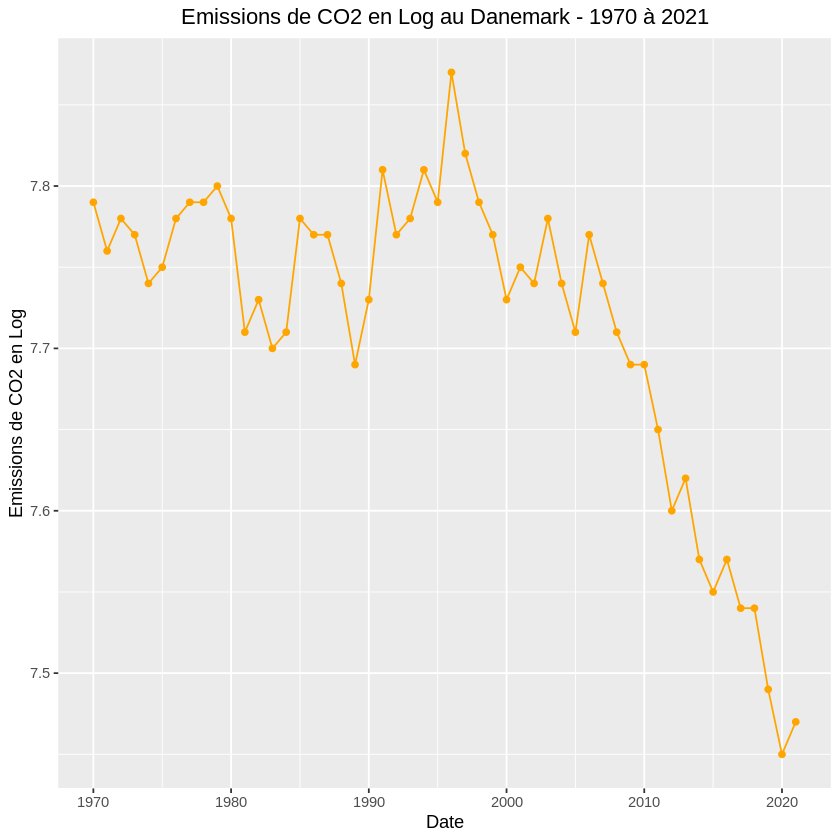

In [ ]:
# Questions 2 - Emissions de CO2 : Représentations graphiques et autocorrélogrammes (simples et partiels)
library(ggplot2)
graphemCO2 <-ggplot(data=datadenmark2,aes(x=annees,y=logemCO2))+geom_point(color='orange')+geom_line(color='orange')+xlab('Date')+ylab('Emissions de CO2 en Log')+ggtitle('Emissions de CO2 en Log au Danemark - 1970 à 2021')+theme(plot.title = element_text(hjust = 0.5))
graphemCO2

**Commentaires:**
A priori, cette série n'est pas stationnaire.

On appelle corrélogramme simple (partiel) d’une série chronologique le graphe de sa fonction d’autocorrélation (partielle) en fonction de la différence des temps d’observation h.

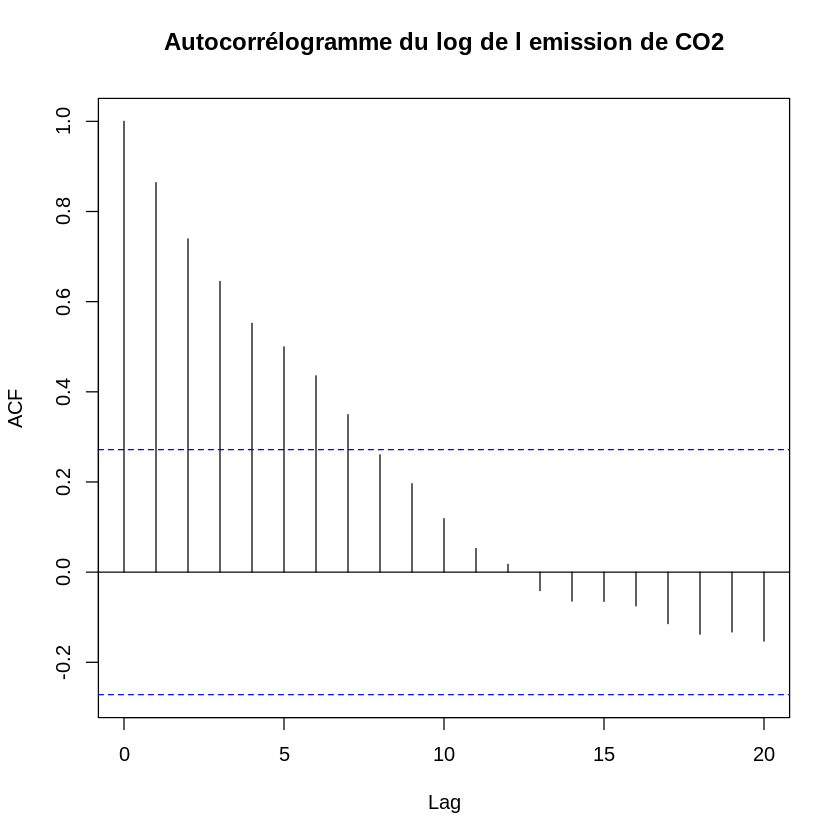

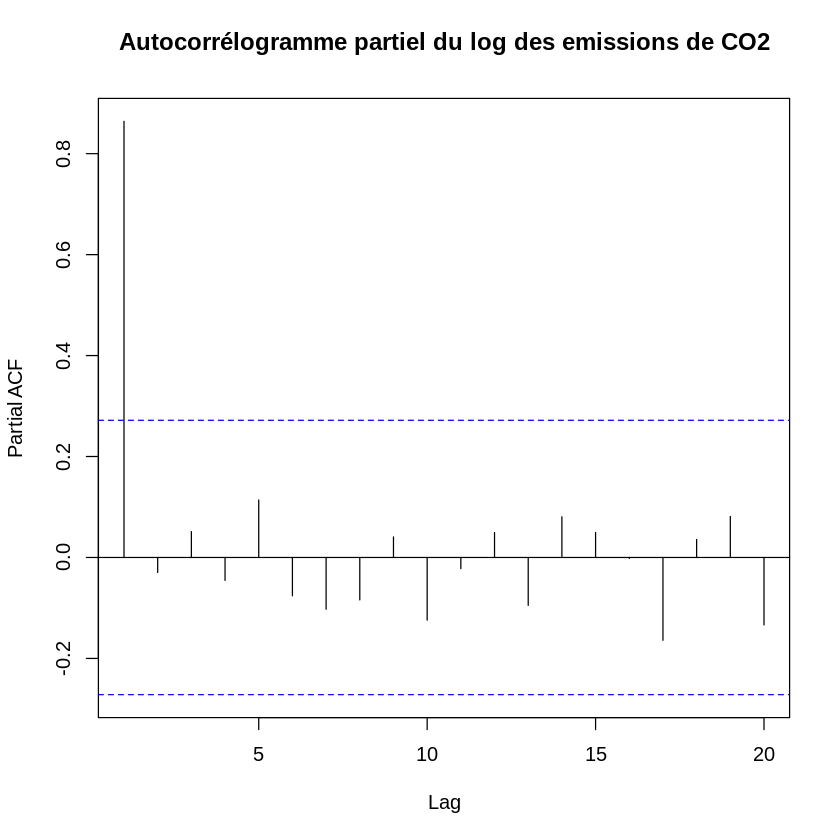

In [ ]:
datadenmark2$logemCO2 <- as.numeric(datadenmark2$logemCO2)
acf(datadenmark2$logemCO2, lag.max = 20, main='Autocorrélogramme du log de l emission de CO2')
pacf(datadenmark2$logemCO2, lag.max=20, main='Autocorrélogramme partiel du log des emissions de CO2')

**Commentaires:**
*   On observe que les autocorrélations sont positives significativement jusqu'au retard 7. Il existe donc une corrélation positive entre les valeurs de la série à des intervalles de temps successifs. Autrement dit, lorsque l'autocorrélation est positive, cela indique qu'une observation est corrélée positivement avec les observations précédentes ou suivantes dans le temps.
*   Les 2 premières autocorrélations sont proches de 1 (>0,8), puis les suivantes décroissent rapidement vers 0.
*   Nous ne pouvons pas conclure sur la stationnarité à ce stade.
*   Les autocorrélations suggèrent un AR(1). Le modèle AR(1) est un type de modèle autorégressif où la valeur actuelle de la série temporelle dépend linéairement de sa valeur précédente, augmentée d'un terme d'erreur stochastique.

**Test de Dickey-Fuller Augmenté**

Nous appliquons le test de Dickey-Fuller, utilisé pour évaluer la présence de racines unitaires dans une série temporelle, ce qui est lié à la question de la stationnarité. Un processus avec une racine unitaire n'est pas stationnaire, et le test Dickey-Fuller est conçu pour détecter cette non-stationnarité.
La présence de racines unitaires peut être un indicateur que la série temporelle a une tendance ou une structure temporelle qui évolue au fil du temps, ce qui peut rendre plus difficile la modélisation ou la prédiction de la série.
La forme la plus courante du test Dickey-Fuller est le test augmenté de Dickey-Fuller (ADF), que nous appliquons ici.

Nous posons les hypothèses suivantes:
- Hypothèse nulle: La série temporelle a une racine unitaire, ce qui indique qu'elle n'est pas stationnaire.
- Hypothèse alternative: La série temporelle n'a pas de racine unitaire, ce qui indique qu'elle est stationnaire.

In [ ]:
# Questions 3 - Emissions de CO2 : Stationnarisation
install.packages("urca")
library(urca)

adflogemCO2<-ur.df(y = datadenmark2$logemCO2,type=c("trend"), lag=8, selectlags = c('AIC'))
summary(adflogemCO2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.074404 -0.023377 -0.002261  0.015293  0.078451 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0201940  0.7972984   0.025   0.9799  
z.lag.1     -0.0002910  0.1015958  -0.003   0.9977  
tt          -0.0010290  0.0006299  -1.634   0.1111  
z.diff.lag1 -0.2209811  0.1785956  -1.237   0.2240  
z.diff.lag2 -0.2709648  0.1793955  -1.510   0.1397  
z.diff.lag3 -0.0168462  0.1711520  -0.098   0.9221  
z.diff.lag4 -0.3916654  0.1639743  -2.389   0.0223 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03507 on 36 degrees of freedom
Multiple R-squared:  0.2521,	Adjusted R-squared:  0.1275 
F-statistic: 2.023 on 6 and 36

**Commentaires:**
- Le premier coefficient n'est pas significativement différent de zéro (p-value = 0.9977), et il en va de même pour les 2ème et 3ème coefficients.
- Nous remarquons que nous n'avons qu'un seul coefficient significatif (le 4ème), à un seuil de 1% (p-value = 0.0223).
- Notons tout de même que le 2ème coefficient est proche de la limite de signification.
- L'intercept n'est pas significativement différent de zéro (p-value=0,9799).

Nous choisissons donc un lag max p = 4

In [ ]:
library(urca)
adflogemCO2<-ur.df(y = datadenmark2$logemCO2,type=c("trend"), lag=4, selectlags = c('AIC'))
summary(adflogemCO2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07361 -0.02191 -0.00213  0.01501  0.07855 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.0145083  0.7401687   0.020   0.9845  
z.lag.1      0.0003016  0.0945647   0.003   0.9975  
tt          -0.0009945  0.0005115  -1.944   0.0589 .
z.diff.lag1 -0.2105722  0.1681850  -1.252   0.2178  
z.diff.lag2 -0.2790199  0.1695424  -1.646   0.1077  
z.diff.lag3 -0.0278780  0.1629520  -0.171   0.8650  
z.diff.lag4 -0.3722973  0.1552587  -2.398   0.0212 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03366 on 40 degrees of freedom
Multiple R-squared:  0.2589,	Adjusted R-squared:  0.1477 
F-statistic: 2.329 on 6 and 40 DF,  p-va

**Commentaires:**

La statistique de test est présentée sous la forme de trois valeurs:
*   $t_{tau3}̂=0.00323$ est supérieur au seuil de rejet pour des risques de première espèces de 1%, 5% et 10%. Nous ne pouvons pas rejeter l'hypothèse nulle de racine unitaire.
*  $t_{ϕ2}̂ = 2.9868$ est inférieure à tous les seuils de rejets pour des risques de première espèces de 1%, 5% et 10% : on peut supposer qu'il y a une racine unitaire, pas de tendance déterministe et pas de constante.
*  $t_{\hat{\phi3}} = 3.0817$ est inférieure à tous les seuils de rejet pour des risques de première espèces de 1%, 5% et 10%. Il est probable que nous ayons une racine unitaire et pas de constante.

La p-value associée à la statistique du F-test est de 0.05058, ce qui est proche du seuil de 0.05. Cela suggère que l'on pourrait être au bord du rejet de l'hypothèse nulle d'une racine unitaire.

La série temporelle étudiée pourrait être stationnaire compte tenu de la p-value proche de 0.05. Notons tout de même que cela dépend également des valeurs critiques et de la significativité choisies.

Le 4ème coefficient est significatif à un niveau de 0.05, ce qui peut indiquer qu'il y a des éléments dans les lags de la première différence de la série temporelle qui contribuent à la stationnarité.



In [ ]:
# Test regression drift (ADF avec constante)
library(urca)
adflogemCO22<-ur.df(y = datadenmark2$logemCO2,type=c("drift"), lag=4, selectlags = c('AIC'))
summary(adflogemCO22)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.063838 -0.021948 -0.002945  0.021221  0.083402 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.89459    0.59288  -1.509   0.1390  
z.lag.1      0.11445    0.07660   1.494   0.1428  
z.diff.lag1 -0.25096    0.17246  -1.455   0.1532  
z.diff.lag2 -0.30912    0.17446  -1.772   0.0839 .
z.diff.lag3 -0.03556    0.16834  -0.211   0.8338  
z.diff.lag4 -0.39262    0.16007  -2.453   0.0185 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03478 on 41 degrees of freedom
Multiple R-squared:  0.1889,	Adjusted R-squared:  0.08997 
F-statistic:  1.91 on 5 and 41 DF,  p-value: 0.1136


Value of test-statistic is: 1.4941 2.4259 

Cri

**Commentaires:**
La statistique de test est présentée sous la forme de deux valeurs :
*  $t_{tau2}̂=1.4941$ est supérieure au seuil de rejet pour des risques de première espèces de 1%, 5% et 10%. Nous ne pouvons pas rejeter l'hypothèse nulle de racine unitaire.
*  $t_{\hat{\phi1}} = 2.4259$ est inférieure à tous les seuils de rejet pour des risques de première espèces de 1%, 5% et 10%. Il est probable que nous ayons une racine unitaire et pas de constante.

La p-value associée à la statistique de test est de 0.1136, ce qui est supérieur au seuil de 0.05. Cela suggère que l'on ne peut pas rejeter l'hypothèse nulle d'une racine unitaire à un niveau de confiance de 95%.

Aucun des coefficients n'est significatif au seuil de 0.05, bien que le quatrième soit significatif au seuil de 1% (p−value=0.0185).

In [ ]:
# Test regression none (ADF sans tendance déterministe ni constante)
library(urca)
adflogemCO23<-ur.df(y = datadenmark2$logemCO2,type=c("none"), lag=4, selectlags = c('AIC'))
summary(adflogemCO23)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058749 -0.024872 -0.001876  0.019691  0.087157 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
z.lag.1     -0.0011260  0.0007123  -1.581   0.1214  
z.diff.lag1 -0.1100109  0.1471621  -0.748   0.4589  
z.diff.lag2 -0.1674332  0.1492558  -1.122   0.2683  
z.diff.lag3  0.0808120  0.1518864   0.532   0.5975  
z.diff.lag4 -0.3016126  0.1505093  -2.004   0.0516 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03531 on 42 degrees of freedom
Multiple R-squared:  0.165,	Adjusted R-squared:  0.06562 
F-statistic:  1.66 on 5 and 42 DF,  p-value: 0.1654


Value of test-statistic is: -1.5809 

Critical values for test statistics: 
     1pct  5

**Commentaires**:
$t_{tau1}̂=-1.5809$ est supérieure au seuil de rejet pour des risques de première espèces de 1%, 5% et 10%. Nous ne pouvons pas rejeter l'hypothèse nulle de racine unitaire.

La p-value associée à la statistique de test est de 0.1654, ce qui est supérieur au seuil de 0.05. Cela confirme que l'on ne peut pas rejeter l'hypothèse nulle d'une racine unitaire à un niveau de confiance de 95%.

Aucun des coefficients n'est significatif au seuil de 0.05.


Il semblerait que nous faisons face à une série Unit Root sans Trend et sans Constante. Vérifions cela avec les tests KPSS.

Nous effectuons maintenant le test de KPSS qui permet également d'évaluer la stationnarité, en prenant en compte une tendance déterministe jusqu'à un certain ordre. Nous le comprenons comme une alternative au test Dickey-Fuller qui considère la présence d'une racine unitaire.


In [ ]:
# Test de stationnarité : test de KPSS avec tendance déterministe
test_tauKPSSemCO2 <- ur.kpss(datadenmark2$logemCO2,type="tau")
summary(test_tauKPSSemCO2)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.2939 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Commentaires:**
*   H0 :  stationnaire avec tendance déterministe

    H1 : non-stationnaire autour d'une tendance déterministe (possibilité d'une racine unitaire)
*   Statistique du test KPSS : $t_{KPSStau} = 0.2939$
*   $t_{KPSStau}$ est t est supérieure à toutes les valeurs critiques (0.119, 0.146, 0.176, 0.216).

Étant donné que la statistique de test est supérieure aux valeurs critiques, nous pouvons alors rejeter l'hypothèse nulle. Il est possible que nous ayons une racine unitaire.

In [ ]:
# Test de KPSS avec constante
test_muKPSSemCO2<-ur.kpss(datadenmark2$logemCO2,type="mu",lags="short")
summary(test_muKPSSemCO2)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 0.8578 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


**Commentaires**  :
*   H0 : Stationnaire autour d'une constante

    H1 : Non-stationnaire autour d'une constante

*   Statistique du test KPSS : $t_{KPSSmu} = 0.8578$
*   $t_{KPSSmu}$ est supérieure à toutes les valeurs critiques (0.347, 0.463, 0.574, 0.739).

La statistique de test étant supérieure aux valeurs critiques, nous pouvons rejeter l'hypothèse nulle. La série temporelle n'est donc pas stationnaire autour d'une tendance déterministe et d'une constante.


**Conclusion**

Nous avons sûrement une racine unitaire sans constante et sans tendance déterministe.

Pour stationnariser notre série, nous passons ainsi par une différenciation première

In [ ]:
r_logemCO2<-data.frame(datadenmark2$annees[-1],diff(datadenmark2$logemCO2))
colnames(r_logemCO2)<-c('annees','rlogemCO2')

In [ ]:
str(r_logemCO2)
print(r_logemCO2)

'data.frame':	51 obs. of  2 variables:
 $ annees   : int  1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 ...
 $ rlogemCO2: num  -0.03 0.02 -0.01 -0.03 0.01 ...
   annees rlogemCO2
1    1971     -0.03
2    1972      0.02
3    1973     -0.01
4    1974     -0.03
5    1975      0.01
6    1976      0.03
7    1977      0.01
8    1978      0.00
9    1979      0.01
10   1980     -0.02
11   1981     -0.07
12   1982      0.02
13   1983     -0.03
14   1984      0.01
15   1985      0.07
16   1986     -0.01
17   1987      0.00
18   1988     -0.03
19   1989     -0.05
20   1990      0.04
21   1991      0.08
22   1992     -0.04
23   1993      0.01
24   1994      0.03
25   1995     -0.02
26   1996      0.08
27   1997     -0.05
28   1998     -0.03
29   1999     -0.02
30   2000     -0.04
31   2001      0.02
32   2002     -0.01
33   2003      0.04
34   2004     -0.04
35   2005     -0.03
36   2006      0.06
37   2007     -0.03
38   2008     -0.03
39   2009     -0.02
40   2010      0.00
41   2011     -0.

In [ ]:
install.packages("FinTS")
library(FinTS)
stat_des<-FinTS.stats(r_logemCO2$rlogemCO2)
stat_des

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Warning message in FinTS.stats(r_logemCO2$rlogemCO2):
“requires(e1071) for skewnessand kurtosis; returning NAs”


Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,51,-0.00627451,0.03549427,NA,NA,-0.07,0.08


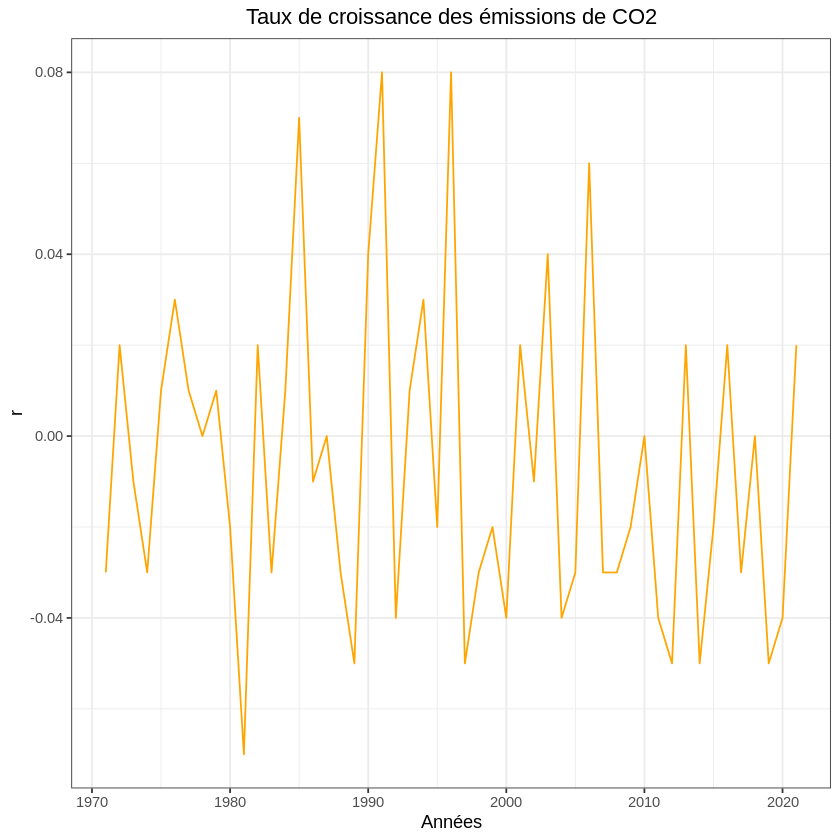

In [ ]:
graphrlogemCO2 <- ggplot(data = r_logemCO2, aes(x = annees, y = rlogemCO2)) + geom_line(colour = 'orange') + ggtitle('Taux de croissance des émissions de CO2') + xlab('Années') + ylab('r') + theme_bw() + theme(plot.title = element_text(hjust = 0.5))
print(graphrlogemCO2)

**Commentaires:** Le graphique a l'air de représenter une série plus stationnaire que précédemment. La variance semble toutefois diminuer avec le temps. Nous utiliserons des test ADF et KPSS afin de tester la stationnarité de cette nouvelle série.

In [ ]:
# Test regression trend (ADF avec constante et tendance déterministe)
library(urca)
adfrlogemCO2<-ur.df(y = r_logemCO2$rlogemCO2,type=c("trend"), lag=4, selectlags = c('AIC'))
summary(adfrlogemCO2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.075429 -0.021780 -0.001371  0.015574  0.077614 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0184987  0.0117980   1.568   0.1248    
z.lag.1     -1.9325182  0.3660912  -5.279 4.85e-06 ***
tt          -0.0010830  0.0004181  -2.590   0.0133 *  
z.diff.lag1  0.7061222  0.3110894   2.270   0.0287 *  
z.diff.lag2  0.4154706  0.2322724   1.789   0.0812 .  
z.diff.lag3  0.3861672  0.1467999   2.631   0.0120 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03346 on 40 degrees of freedom
Multiple R-squared:  0.6781,	Adjusted R-squared:  0.6378 
F-statistic: 16.85 on 5 and 40 DF,  p-value: 6.083e-09


Value of tes

**Commentaires:**

*   $t_{tau3}̂=-5.2788$ est inférieure au seuil de rejet pour des risques de première espèces de 1%, 5% et 10%. Nous pouvons rejeter l'hypothèse nulle de racine unitaire.
*  $t_{ϕ2}̂ = 9.3082$ est supérieure à tous les seuils de rejets pour des risques de première espèces de 1%, 5% et 10%.
*  $t_{\hat{\phi3}} = 13.9582$ est supérieure à tous les seuils de rejet pour des risques de première espèces de 1%, 5% et 10%.

Il est probable que nous n'ayons plus de racine unitaire.
Notre série semble désormais stationnaire, étant donné que la p-value du F-test (6.083e-09) est très proche de 0. Nos résultats sont donc significatifs à 1%.

In [ ]:
# Test regression trend (ADF avec constante)
library(urca)
adfrlogemCO22<-ur.df(y = r_logemCO2$rlogemCO2,type=c("drift"), lag=4, selectlags = c('AIC'))
summary(adfrlogemCO22)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058659 -0.024989 -0.002162  0.020440  0.087180 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.008850   0.005617  -1.575    0.123    
z.lag.1     -1.503386   0.348435  -4.315 9.83e-05 ***
z.diff.lag1  0.392565   0.305864   1.283    0.207    
z.diff.lag2  0.223566   0.234962   0.951    0.347    
z.diff.lag3  0.301806   0.152780   1.975    0.055 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03571 on 41 degrees of freedom
Multiple R-squared:  0.6241,	Adjusted R-squared:  0.5874 
F-statistic: 17.02 on 4 and 41 DF,  p-value: 2.686e-08


Value of test-statistic is: -4.3147 9.3119 

Critical values for test statisti

**Commentaires:**

*   $t_{tau2}̂=-4.3147$ est inférieure au seuil de rejet pour des risques de première espèces de 1%, 5% et 10%. Nous pouvons rejeter l'hypothèse nulle de racine unitaire.
*  $t_{\hat{\phi1}} = 9.3119$ est supérieure à tous les seuils de rejet pour des risques de première espèces de 1%, 5% et 10%.

Il est probable que nous n'ayons plus de racine unitaire.
Notre série semble désormais stationnaire, étant donné que la p-value du F-test (2.686e-08) est très proche de 0. Nos résultats sont donc significatifs à 1%

In [ ]:
#Test regression trend (ADF sans constante ni tendance déterministe)
library(urca)
adfrlogemCO23<-ur.df(y = r_logemCO2$rlogemCO2,type=c("none"), lag=4, selectlags = c('AIC'))
summary(adfrlogemCO23)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.06754 -0.03206 -0.01152  0.01131  0.08091 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1      -1.3132     0.3326  -3.949 0.000294 ***
z.diff.lag1   0.2470     0.2967   0.833 0.409768    
z.diff.lag2   0.1336     0.2319   0.576 0.567498    
z.diff.lag3   0.2648     0.1536   1.724 0.092079 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03634 on 42 degrees of freedom
Multiple R-squared:  0.6013,	Adjusted R-squared:  0.5634 
F-statistic: 15.84 on 4 and 42 DF,  p-value: 5.589e-08


Value of test-statistic is: -3.9486 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


**Commentaires** :

$t_{tau2}̂=-3.9486$ est inférieure au seuil de rejet pour des risques de première espèces de 1%, 5% et 10%. Nous pouvons rejeter l'hypothèse nulle de racine unitaire.

Il est probable que nous n'ayons plus de racine unitaire.
Notre série semble désormais stationnaire, étant donné que la p-value du F-test (5.589e-08) est très proche de 0. Nos résultats sont donc significatifs à 1%

**Conclusion**

Notre série différenciée est donc bien stationnaire à présent.

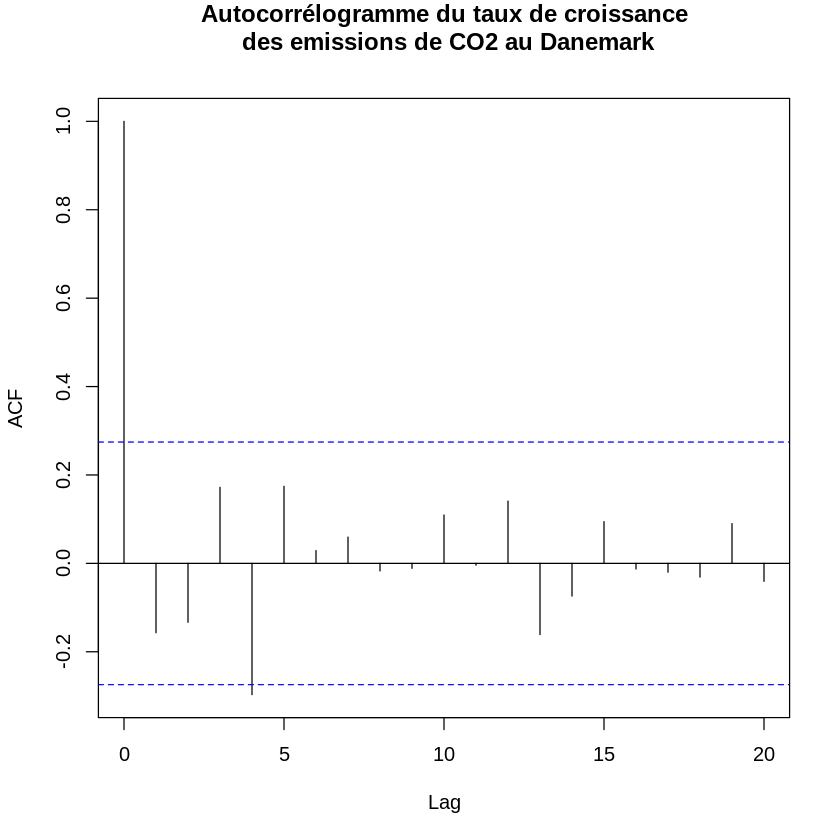

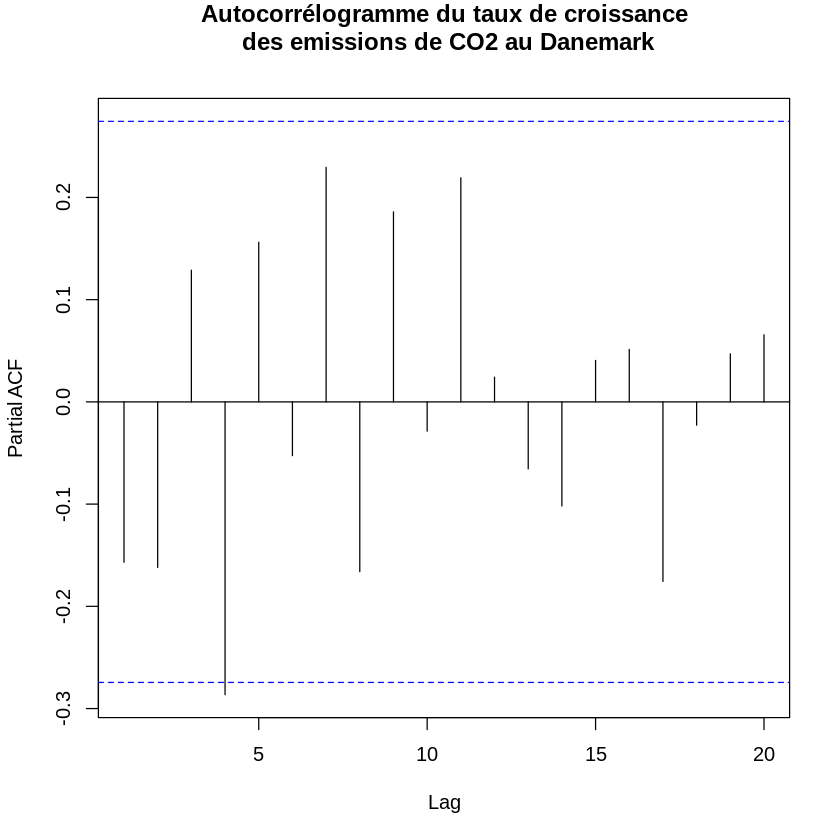

In [ ]:
# Questions 4 : Recherche du modèle ARMA qui satisfait les conditions de validité
acf(r_logemCO2$rlogemCO2, lag.max = 20, main='Autocorrélogramme du taux de croissance
 des emissions de CO2 au Danemark')
pacf(r_logemCO2$rlogemCO2, lag.max = 20, main='Autocorrélogramme du taux de croissance
 des emissions de CO2 au Danemark')

Possibilités
- ACF : MA(1) q = 1
- PACF : AR(0) p = 0
- ARIMA (0,0,1)

Nous testons un MA(1).
Les MA sont toujours stationnaires.

Notre série est donc bien stationnarisée. Cela semble cohérent avec nos tests précédents.

## Contribution des énergies renouvelables à l'approvisionement total en énergie primaire au Danemark

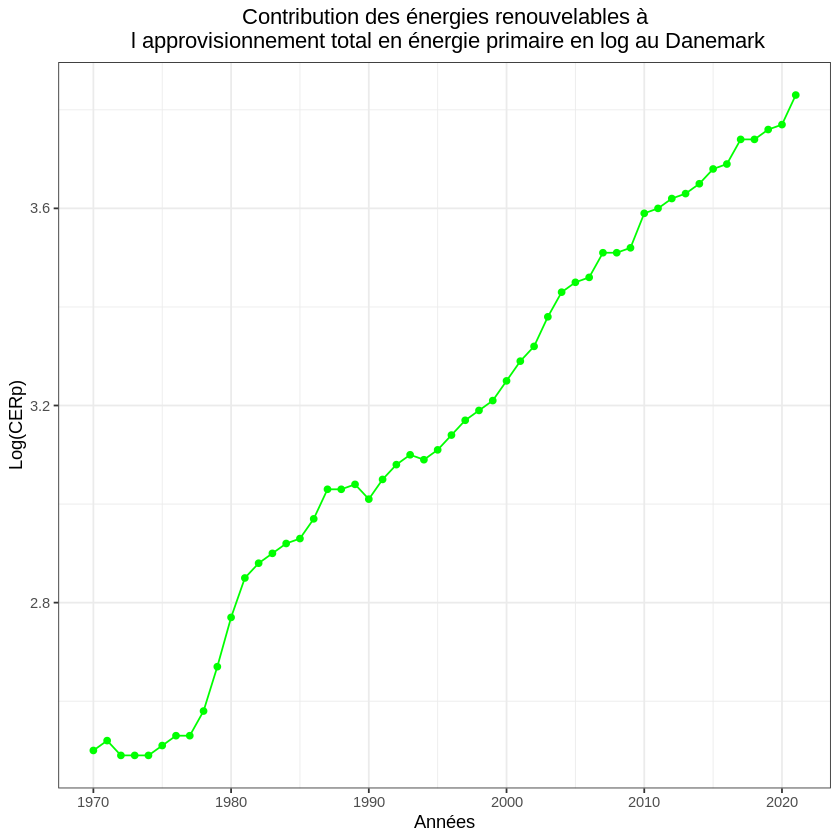

In [ ]:
#Question 2 - CERp
library(ggplot2)
graphCERp<-ggplot(data=datadenmark2,aes(x=annees,y= logCERp))+geom_point(colour='green') + geom_line(colour='green')+ggtitle('Contribution des énergies renouvelables à
 l approvisionnement total en énergie primaire en log au Danemark')+xlab('Années')+ylab('Log(CERp)')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
graphCERp

**Commentaires:**
A priori, cette série n'est pas stationnaire non plus.
Ou alors, elle pourrait l'être autour d'une tendance déterministe linéaire à la hausse.

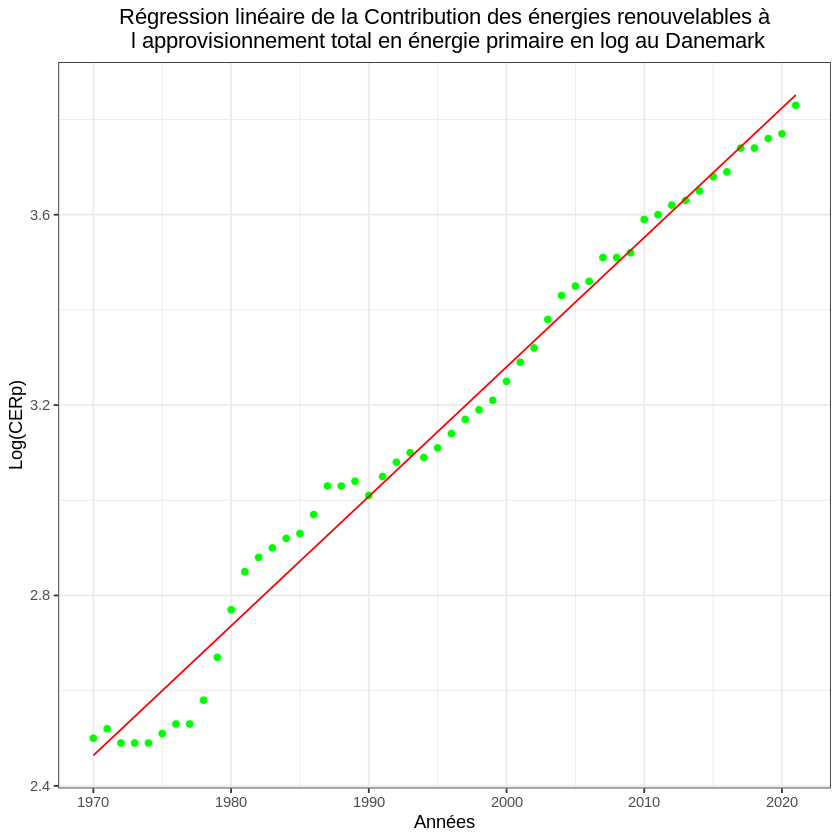

In [ ]:
logCERp_regression <- lm(logCERp ~ annees, data =datadenmark2)
regression <- data.frame(annees = datadenmark2$annees, y_pred= predict(logCERp_regression))
regCERp<-ggplot(datadenmark2,aes(x=annees,y= logCERp))+geom_point(colour='green') + geom_line(data = regression, aes(y=y_pred),colour='red')+ggtitle('Régression linéaire de la Contribution des énergies renouvelables à
 l approvisionnement total en énergie primaire en log au Danemark')+xlab('Années')+ylab('Log(CERp)')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
regCERp

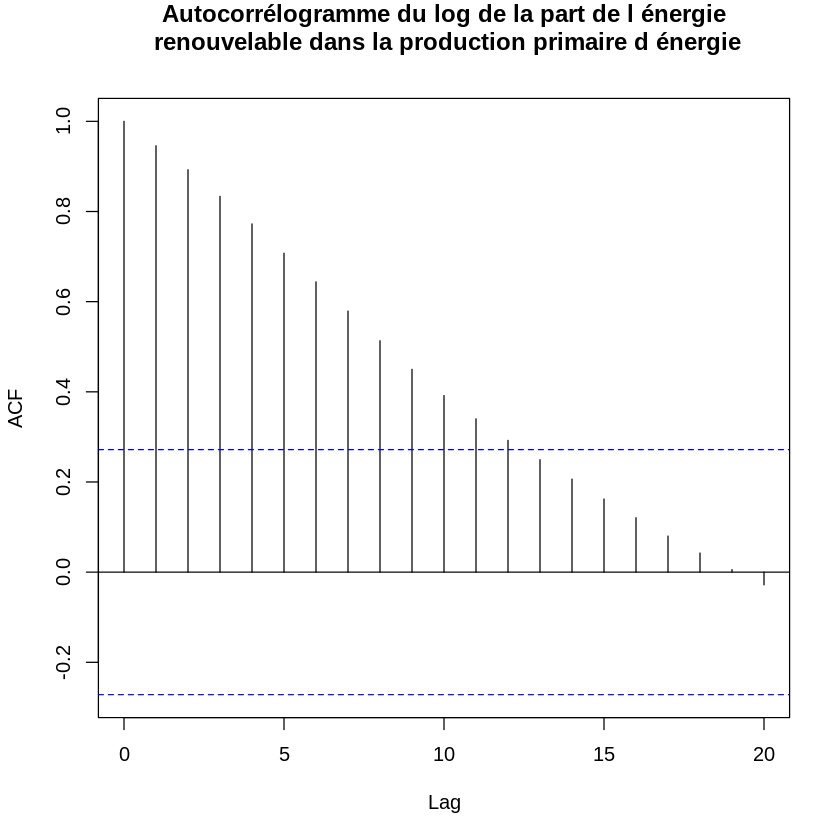

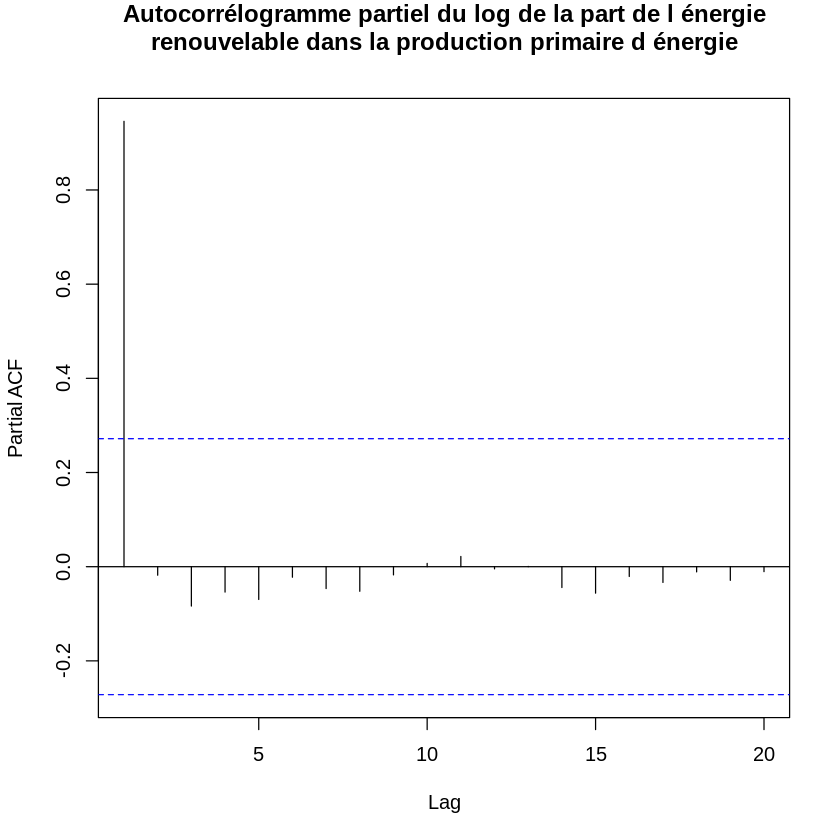

In [ ]:
datadenmark2$logCERp <- as.numeric(datadenmark2$logCERp)
acf(datadenmark2$logCERp, lag.max = 20, main='Autocorrélogramme du log de la part de l énergie
 renouvelable dans la production primaire d énergie')
pacf(datadenmark2$logCERp, lag.max=20, main='Autocorrélogramme partiel du log de la part de l énergie
 renouvelable dans la production primaire d énergie ')

**Commentaires:**
*   Les autocorrélations sont significatives
jusqu'à l'ordre 12 et décroissent plus ou moins lentement.
*   L'autocorrélation partielle d'ordre 1 est l'unique différente de 0 significativement.
*   Nous estimons dans un premier temps qu'il s'agit d'un AR(1) non stationnaire.








In [ ]:
# Test de stationnarité : Test de Dickey-Fuller augmenté
# Si p = 0, on parle de test de DF simple, sinon de test de DF augmenté (ADF).
install.packages("urca")
library(urca)

# Test regression trend (ADF avec constante et tendance déterministe)
# Nous prenons un lag assez large à p=15
adflogCERp<-ur.df(y = datadenmark2$logCERp,type=c("trend"), lag=15, selectlags = c('AIC'))
summary(adflogCERp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0293187 -0.0082645 -0.0002063  0.0088192  0.0266021 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)   4.81328    1.28877   3.735  0.00140 **
z.lag.1      -2.04558    0.55500  -3.686  0.00157 **
tt            0.05409    0.01468   3.685  0.00157 **
z.diff.lag1   1.21001    0.44933   2.693  0.01441 * 
z.diff.lag2   1.01791    0.38688   2.631  0.01646 * 
z.diff.lag3   0.89352    0.34485   2.591  0.01792 * 
z.diff.lag4   0.94153    0.30281   3.109  0.00577 **
z.diff.lag5   0.91679    0.28393   3.229  0.00442 **
z.diff.lag6   0.83369    0.25666   3.248  0.00423 **
z.diff.lag7   0.92978    0.24941   3.728  0.00143 **
z.diff.lag8   0.70309    0.25859   2.719  0.0

In [ ]:
# Nous remarquons que à p = 12 nous avons le dernier retard significatif. Ceci coincide avec notre autocorrélogramme simple.

# Test regression trend (ADF avec constante et tendance déterministe)
library(urca)
adflogCERp<-ur.df(y = datadenmark2$logCERp,type=c("trend"), lag=12, selectlags = c('AIC'))
summary(adflogCERp)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027154 -0.009987  0.000390  0.010683  0.033344 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.594411   0.391462   4.073 0.000345 ***
z.lag.1     -0.655061   0.162533  -4.030 0.000387 ***
tt           0.017338   0.004249   4.081 0.000338 ***
z.diff.lag1  0.117829   0.161019   0.732 0.470389    
z.diff.lag2  0.161420   0.150332   1.074 0.292098    
z.diff.lag3  0.135772   0.139412   0.974 0.338452    
z.diff.lag4  0.278739   0.135694   2.054 0.049401 *  
z.diff.lag5  0.235208   0.140763   1.671 0.105875    
z.diff.lag6  0.211941   0.136019   1.558 0.130425    
z.diff.lag7  0.363582   0.135535   2.683 0.012119 *  
z.diff.lag8  0.221958   0.150457   1.475 0.1

**Commentaires:**

Les résultats du test ADF indiquent que la série temporelle semble être stationnaire après avoir pris la première différence, ce qui suggère l'absence d'une racine unitaire.
*   $t_{tau3}̂$ est inférieure au seuil de rejet pour les risques de première espèce à 5% et 10%. Nous pouvons rejeter l'hypothèse nulle de racine unitaire à 5% et 10%.  Il est probable que nous ayons une racine unitaire pour un risque de première espèce à 5% et 10%. Nous ne pouvons toutefois pas rejeter H0 à 1%.
*  $t_{ϕ2}̂ = 9.5977$ est supérieure à tous les seuils de rejets  : nous pouvons supposer qu'il y a une constante et la présence d'une tendance déterministe.
*   Le t-stat de la tendance déterministe est égal à $t_{\hat{\phi3}} = 8.5042$. Le seuil de rejet qui figure dans la table pour de $t_{\hat{\phi3}}$ est égal à 8.73  pour un risque de première espèce de 1%. on a donc $\vert t_{\hat{\phi3}} \vert = 8.5042 < 8.73 $ : on ne peut pas rejeter l'hypothèse nulle que la tendance déterministe n'est pas significative pour un risque de première espèce à 1%. Toutefois,  ϕ3 est significatif à 5% et 10%. Laisse supposer qu'on a une constante.








In [ ]:
# Test regression drift (ADF avec constante)
library(urca)
adflogCERp2<-ur.df(y = datadenmark2$logCERp,type=c("drift"), lag=12, selectlags = c('AIC'))
summary(adflogCERp2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.054530 -0.015410 -0.002705  0.013421  0.043107 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.010704   0.040304   0.266    0.792
z.lag.1      0.004922   0.012095   0.407    0.686
z.diff.lag  -0.113642   0.172133  -0.660    0.513

Residual standard error: 0.02141 on 36 degrees of freedom
Multiple R-squared:  0.01579,	Adjusted R-squared:  -0.03889 
F-statistic: 0.2888 on 2 and 36 DF,  p-value: 0.7509


Value of test-statistic is: 0.4069 12.9722 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


**Commentaires:**

*   $t_{tau2}̂=0.4069$ est supérieure aux seuils de rejets pour les risques de première espèce à 1%, 5% et 10%. Il est possible que nous ayons une racine unitaire.Nous avons alors que la statistique de test est supérieure aux valeurs critiques et que la p-value est élevée, on ne peut donc pas rejeter l'hypothèse nulle d'une racine unitaire.
*   $t_{ϕ_1̂}= 12.9722$ est supérieure aux seuils de rejets associés pour les risques de première espèce à 1%, 5% et 10%.  On a possiblement une constante.






In [ ]:
# Test regression none (ADF sans tendance déterministe ni constante)
library(urca)
adflogCERp3<-ur.df(y = datadenmark2$logCERp,type=c("none"), lag=12, selectlags = c('AIC'))
summary(adflogCERp3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.053531 -0.015152 -0.002245  0.014234  0.042578 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
z.lag.1     0.008106   0.001573   5.152 8.82e-06 ***
z.diff.lag -0.111172   0.169709  -0.655    0.516    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02113 on 37 degrees of freedom
Multiple R-squared:  0.5858,	Adjusted R-squared:  0.5634 
F-statistic: 26.16 on 2 and 37 DF,  p-value: 8.288e-08


Value of test-statistic is: 5.1518 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


**Commentaires:**

 $t_{tau1}̂=5.1518$ est supérieure aux seuils de rejets pour les risques de première espèce à 1%, 5% et 10%. Nous ne pouvons rejetter l'hypothèse nulle de racine unitaire.Il est possible que nous ayons une racine unitaire.

Etant donné la tendance déterministe de notre série, la puissance du test de Dickey-Fuller est très faible. Nous passons alors au test KPSS.

In [ ]:
# Test de KPSS avec constante
test_muKPSSCERp<-ur.kpss(datadenmark2$logCERp,type="mu",lags="short")
summary(test_muKPSSCERp)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.371 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


**Commentaires:**
Le test est du type "mu" avec 3 retards.

*   H0 : Stationnaire autour d'une constante
*   Statistique du test KPSS : $t_{KPSSmu} = 1.371$
*   $t_{KPSSmu}$ est supérieure aux seuils de rejets à 1%, 5% et 10%. On rejette alors H0.
*   Nous pouvons alors suggérer que notre série temporelle n'est pas stationnaire autour d'une constante.



In [ ]:
# Test de stationnarité : test de KPSS avec tendance déterministe
test_tauKPSSCERp <- ur.kpss(datadenmark2$logCERp,type="tau")
summary(test_tauKPSSCERp)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.0978 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Commentaires:**
- La statistique de test KPSS est 0.0978, et elle est comparée aux valeurs critiques pour décider de rejeter ou non l'hypothèse nulle.
- On remarque qu'elle est inférieure à toutes les valeurs critiques (0.119, 0.146, 0.176, 0.216) au niveau de 10%, 5% et 1% de significativité. Ainsi, on ne peut pas rejeter l'hypothèse nulle du test KPSS.
- Notre série temporelle peut être stationnaire autour d'une tendance déterministe.





#### Conclusion
Ces différents tests ADF ne nous ont pas permis de conclure sur la nature du log(CERp), soit la contribution de l'énergie renouvelable à la production d'énegie primaire au Danemark en log.

Nous sommes alors passés aux tests KPSS qui, quant à eux, laissent penser que nous avons une série temporelle Unit Root with Trend and Intercept. Elle s'écrirait alors sous la forme $x_t = α+ βt+γx_{t-1} + ϵ_t$

α : constante

β : coefficient de la tendance temporelle

γ : coefficient de la racine unitaire

ϵ(t) : résidus


Afin de stationnariser notre série, nous passons alors par la différenciation première. Nous notons que cela supprimera notre constante.

In [ ]:
r_logCERp<-data.frame(datadenmark2$annees[-1],diff(datadenmark2$logCERp))
colnames(r_logCERp)<-c('annees','rlogCERp')

In [ ]:
str(r_logCERp)
print(r_logCERp)

'data.frame':	51 obs. of  2 variables:
 $ annees  : int  1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 ...
 $ rlogCERp: num  0.02 -0.03 0 0 0.02 ...
   annees rlogCERp
1    1971     0.02
2    1972    -0.03
3    1973     0.00
4    1974     0.00
5    1975     0.02
6    1976     0.02
7    1977     0.00
8    1978     0.05
9    1979     0.09
10   1980     0.10
11   1981     0.08
12   1982     0.03
13   1983     0.02
14   1984     0.02
15   1985     0.01
16   1986     0.04
17   1987     0.06
18   1988     0.00
19   1989     0.01
20   1990    -0.03
21   1991     0.04
22   1992     0.03
23   1993     0.02
24   1994    -0.01
25   1995     0.02
26   1996     0.03
27   1997     0.03
28   1998     0.02
29   1999     0.02
30   2000     0.04
31   2001     0.04
32   2002     0.03
33   2003     0.06
34   2004     0.05
35   2005     0.02
36   2006     0.01
37   2007     0.05
38   2008     0.00
39   2009     0.01
40   2010     0.07
41   2011     0.01
42   2012     0.02
43   2013     0.01
44   2014  

In [ ]:
install.packages("FinTS")
library(FinTS)
stat_des<-FinTS.stats(r_logCERp$rlogCERp)
stat_des

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in FinTS.stats(r_logCERp$rlogCERp):
“requires(e1071) for skewnessand kurtosis; returning NAs”


Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,51,0.02607843,0.02653891,NA,NA,-0.03,0.1


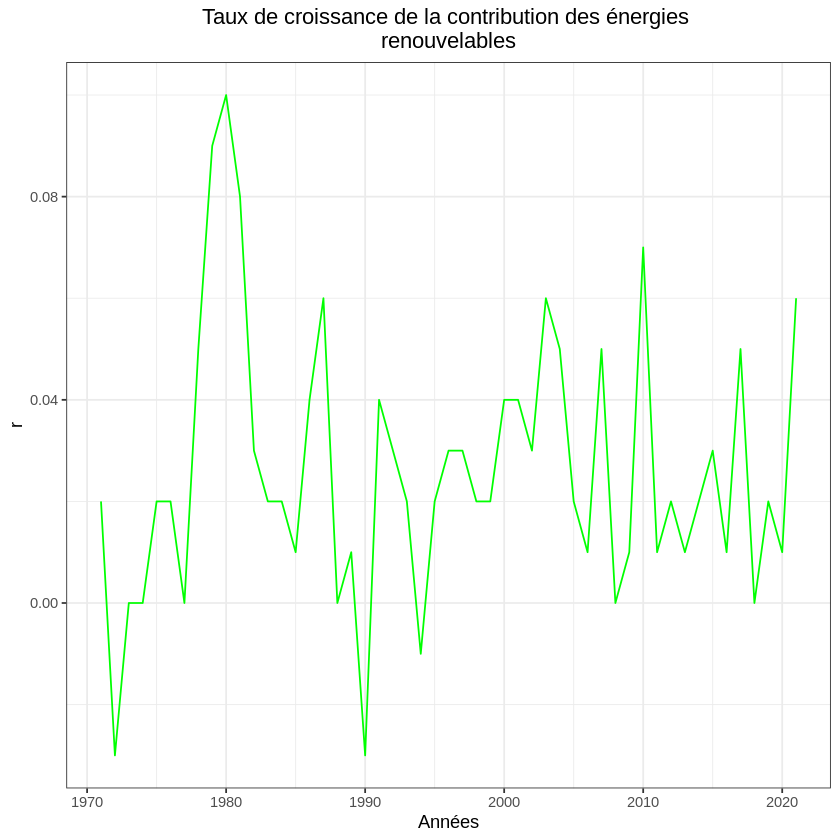

In [ ]:
graphrlogCERp <- ggplot(data = r_logCERp, aes(x = annees, y = rlogCERp)) + geom_line(colour = 'green') + ggtitle('Taux de croissance de la contribution des énergies \
renouvelables') + xlab('Années') + ylab('r') + theme_bw() + theme(plot.title = element_text(hjust = 0.5))
print(graphrlogCERp)

**Commentaires:**
Le graphique affiche une série qui apparaît comme plus stationnaire que précédemment. Nous observons toutefois que la variance semble diminuer avec le temps. Faisons des test afin de nous assurer de la stationnarité.

In [ ]:
# Test regression trend (ADF avec constante et tendance déterministe)
library(urca)
adfrlogCERp<-ur.df(y = r_logCERp$rlogCERp,type=c("trend"), lag=12, selectlags = c('AIC'))
summary(adfrlogCERp)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.056236 -0.012556 -0.001312  0.013846  0.039760 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0236379  0.0121435   1.947   0.0599 .  
z.lag.1     -1.2310783  0.2597591  -4.739 3.73e-05 ***
tt           0.0002002  0.0003234   0.619   0.5401    
z.diff.lag   0.1105535  0.1772013   0.624   0.5369    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02183 on 34 degrees of freedom
Multiple R-squared:  0.5443,	Adjusted R-squared:  0.5041 
F-statistic: 13.53 on 3 and 34 DF,  p-value: 5.661e-06


Value of test-statistic is: -4.7393 7.5478 11.2972 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.

**Commentaires:**
*   $t_{tau3}= -4.7393$ est inferieur à tous les seuils de rejets à 1%, 5% et 10%. Nous pouvons alors rejeter l'hypothèse nulle de racine unitaire : notre série est probablement stationnaire.
*   $t_{ϕ_2} = 7.5478$ est  supérieur à tous les seuils de rejets à 1%, 5% et 10% (significatif). On peut supposer qu'il n'y a pas de racine unitaire, qu'il y a une constante et la présence d'une tendance déterministe.
*  $t_{ϕ_3} = 11.2972$ est  supérieur à tous les seuils de rejets à 1%, 5% et 10% (significatif). Nous avons probablement une constante.

  



In [ ]:
# Test regression trend (ADF avec constante)
library(urca)
adfrlogCERp2<-ur.df(y = r_logCERp$rlogCERp,type=c("drift"), lag=12, selectlags = c('AIC'))
summary(adfrlogCERp2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.058568 -0.013944 -0.002539  0.012444  0.041432 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.029739   0.007029   4.231 0.000159 ***
z.lag.1     -1.222450   0.257089  -4.755 3.36e-05 ***
z.diff.lag   0.105376   0.175437   0.601 0.551944    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02164 on 35 degrees of freedom
Multiple R-squared:  0.5391,	Adjusted R-squared:  0.5128 
F-statistic: 20.47 on 2 and 35 DF,  p-value: 1.296e-06


Value of test-statistic is: -4.755 11.3299 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.71  3.86


**Commentaires:**

*   $t_{tau2}= -4.755$ est inferieur à tous les seuils de rejets à 1%, 5% et 10%. Nous pouvons alors rejeter l'hypothèse nulle de racine unitaire : notre série est probablement stationnaire.
*   $t_{ϕ_1} = 11.3299$ est  supérieur à tous les seuils de rejets à 1%, 5% et 10% (significatif). On peut supposer qu'il y a une constante.

In [ ]:
#Test regression trend (ADF sans constante ni tendance déterministe)
library(urca)
adfrlogCERp3<-ur.df(y = r_logCERp$rlogCERp,type=c("none"), lag=12, selectlags = c('AIC'))
summary(adfrlogCERp3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.048727 -0.014431  0.002912  0.020222  0.060460 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
z.lag.1      -0.2137     0.1535  -1.392  0.17287   
z.diff.lag1  -0.5853     0.1862  -3.143  0.00346 **
z.diff.lag2  -0.3700     0.1749  -2.115  0.04181 * 
z.diff.lag3  -0.2743     0.1511  -1.816  0.07821 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.02509 on 34 degrees of freedom
Multiple R-squared:  0.3987,	Adjusted R-squared:  0.3279 
F-statistic: 5.635 on 4 and 34 DF,  p-value: 0.001367


Value of test-statistic is: -1.3923 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


**Commentaires:**

*   $t_{tau1}= -1.3923$ est supérieure à tous les seuils de rejets à 1%, 5% et 10%. Nous pouvons alors rejeter l'hypothèse nulle de racine unitaire : notre série est probablement stationnaire.


**Conclusion** : Notre nouvelle série est alors stationnaire avec constante et tendance.

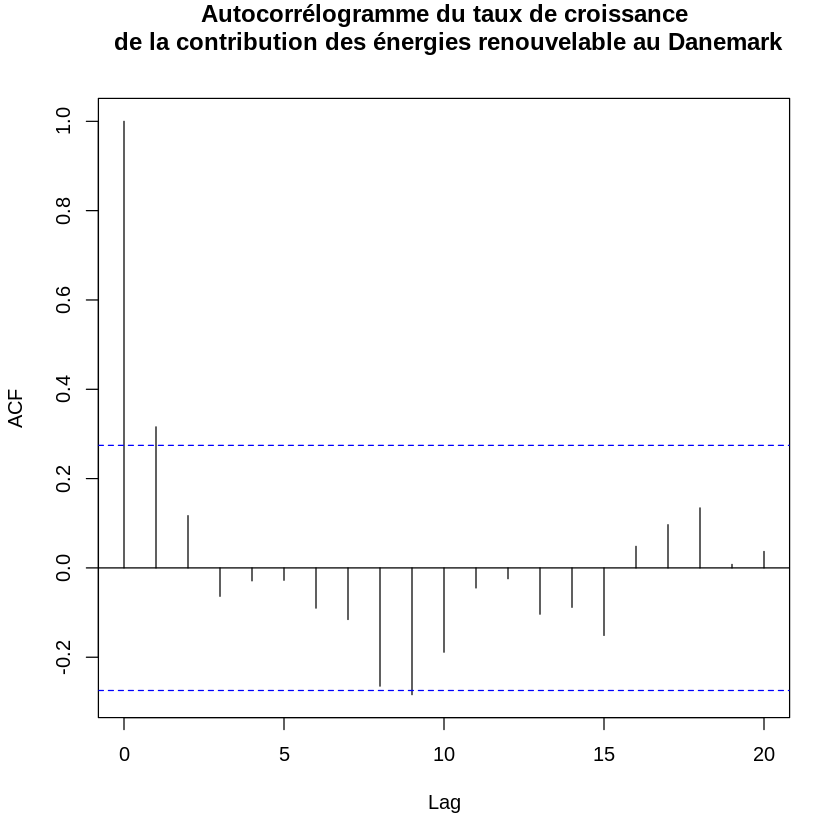

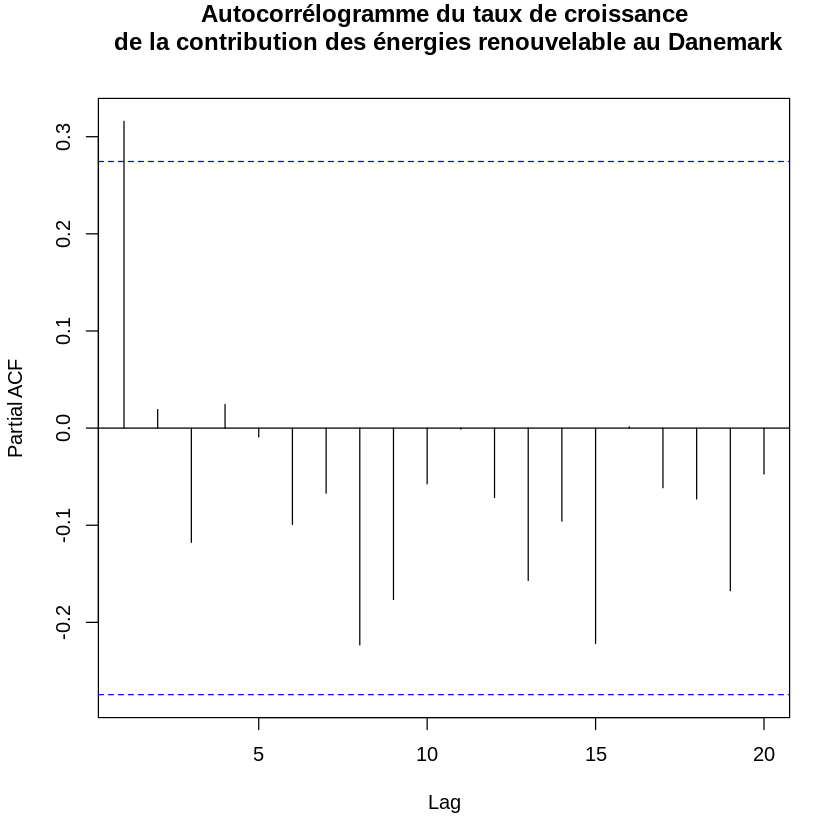

In [ ]:
# Questions 4 : Recherche du modèle ARMA qui satisfait les conditions de validité
acf(r_logCERp$rlogCERp, lag.max = 20, main='Autocorrélogramme du taux de croissance
 de la contribution des énergies renouvelable au Danemark')
pacf(r_logCERp$rlogCERp, lag.max = 20, main='Autocorrélogramme du taux de croissance
 de la contribution des énergies renouvelable au Danemark')

**Commentaires:**
Nous remarquons que les autocorrélogrammes sur l'ACF diminuent très rapidement.
Notre processus est stationnaire. Ceci est cohérent avec les résultats de nos tests.



Possibilités

*   ACF : MA(2) q = 2
*   PACF : AR(1) p = 1
* ARIMA (1,0,2)



Nous allons commencer par mettre de côté les 3 dernières observations de l'échantillon. Ainsi, nous estimerons notre modèle avec les 48 premières observations. L'objectif est alors de comparer les valeurs prédites par le modèle final aux valeurs effectivement observées. Ainsi, on pourra évaluer la qualité des prévisions réalisées en-dehors de l'échantillon utilisé pour faire nos comparaisons.

En se basant sur l'analyse des autocorrélations, nous commençons dans un premier temps par tester un **AR(1)**

In [ ]:
install.packages("forecast")
library(forecast)
# Estimation d'un  modèle
AR1 <-Arima(y = r_logCERp$rlogCERp[1:48],order=c(1,0,0)) #order=c(degré de ton AR p, degré de différentiacion,degré de ton MA q)
# Affichage de l'estimation
summary(AR1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘quadprog’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: ‘forecast’


The following object is masked from ‘package:FinTS’:

    Acf




Series: r_logCERp$rlogCERp[1:48] 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.3383  0.0255
s.e.  0.1353  0.0054

sigma^2 = 0.0006484:  log likelihood = 109.04
AIC=-212.07   AICc=-211.53   BIC=-206.46

Training set error measures:
                       ME       RMSE        MAE  MPE MAPE      MASE        ACF1
Training set 4.553978e-05 0.02492677 0.01913019 -Inf  Inf 0.8027848 0.006823419

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




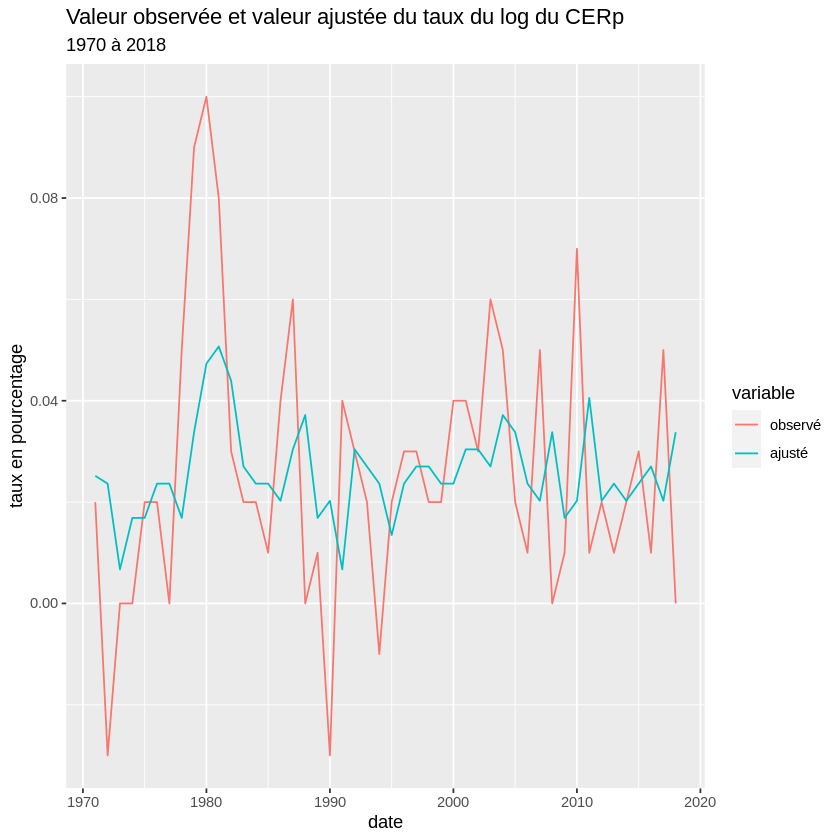

In [ ]:
install.packages("reshape2")
library(ggplot2)
library(reshape2)

rlogCERp_plot<-data.frame(r_logCERp$annees[1:48],r_logCERp$rlogCERp[1:48],F=as.matrix(AR1$fitted))
colnames(rlogCERp_plot)<-c("date","observé","ajusté")

data_melt=melt(as.data.frame(rlogCERp_plot),id.vars = 1)

p_F_rlogCERp<-ggplot(data=data_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
p_F_rlogCERp+labs(y="taux en pourcentage",title = "Valeur observée et valeur ajustée du taux du log du CERp",
            subtitle = "1970 à 2018")

AR(1) : $x_t = c + Φ_1 x_{t-1} + \epsilon_{t}$

avec $\epsilon_{t}$ ~ $BB(0,σ^2)$

Nous allons alors tester la significativité des coefficients :

In [ ]:
#lmtest
library(lmtest)
coeftest(AR1)


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1       0.3382835  0.1352869  2.5005    0.0124 *  
intercept 0.0255031  0.0053857  4.7354 2.187e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


**Analyse des résultats**:

-Les seuils critiques sont :

  seuil = 2.57 pour un risque de première espèce égal à 1\%

  seuil = 1.96 pour un risque de première espèce égal à 5\%

-Significativité de la constante :

$$\left\lbrace\begin{array}{l} H_{0}\,:\,c=0\\
H_{a}\,:\,c \neq 0
\end{array} \right.$$

* La statistique de test $t_{\hat{c}} = \frac{\hat{c}}{\hat{\sigma}_{\hat{c}}} \rightarrow N(0,1)$ sous $H_{0}$ car On dispose de 47 observations.


* $t_{\hat{c}}= \frac{0.0255031}{0.0053857} = 4.7353> 2.57$ : la constante est significative pour un risque de première espèce de 1 %
* La probabilité critique (= 2.187e-06) est inférieure à 1\% pour la constante. Nous rejettons l'hypothèse nulle de non-significativité pour un risque de première espèce de 1% (même pour un risque de première espèce à 0.1%).


-Significativité du coefficient :

$$\left\lbrace\begin{array}{l}
H_{0}\,:\,\phi_{i}=0\\
H_{a}\,:\,\phi_{i} \neq 0
\end{array} \right.$$


*   $t_{\hat{Φ_1}}= \frac{0.3382835}{0.1352869} = 2.50 < 2.57$ : le coefficient est alors significativement différent de 0 pour un risque de première espèce à 1%.
*   La probabilité critique pour ${\hat{Φ_1}}$ (= 0.0124) est légèrement supérieur à 1%. Nous rejettons l'hypothèse nulle de non-significativité pour un risque de première espèce à 5%.

**Conclusion** : Notre coefficient est significatif et notre constante l'est aussi. Nos calculs semblent cohérents avec la sortie R.

In [ ]:
#tstat pour vérifier nos calculs des t-student
AR1$tstat<-AR1$coef/sqrt(diag(AR1$var.coef))
AR1$tstat

ar1 intercept 
 2.500489  4.735367

**Commentaires** : Nous obtenons effectivement les même statistiques de test.

Tentons une autre estimation, un AR(2) :

In [ ]:
AR2 <-Arima(y = r_logCERp$rlogCERp[1:48],order=c(2,0,0))
summary(AR2)

Series: r_logCERp$rlogCERp[1:48] 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
         ar1     ar2    mean
      0.3378  0.0014  0.0255
s.e.  0.1461  0.1534  0.0054

sigma^2 = 0.0006628:  log likelihood = 109.04
AIC=-210.07   AICc=-209.14   BIC=-202.59

Training set error measures:
                       ME       RMSE        MAE  MPE MAPE      MASE        ACF1
Training set 4.723965e-05 0.02492675 0.01913492 -Inf  Inf 0.8029832 0.007351259

In [ ]:
coeftest(AR2)


z test of coefficients:

           Estimate Std. Error z value  Pr(>|z|)    
ar1       0.3377955  0.1461204  2.3118   0.02079 *  
ar2       0.0013559  0.1534269  0.0088   0.99295    
intercept 0.0255006  0.0054001  4.7223 2.332e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Le coefficient du deuxième retard n'est pas du tout significativement différent de 0.

Par ailleurs $AIC(AR2) = -210$ alors que $AIC(AR1) = -212$

et $BIC(AR2) = -202$ alors que $BIC(AR1)=-206$.

Or comme nous devons minimiser ces critères. Il est plus intéressant donc de garder l'AR1.

Nous allons chercher s'il est nécessaire d'ajouter des retards MA.

Commençons alors par ARMA(1,1) :

In [ ]:
ARMA11<-Arima(y = r_logCERp$rlogCERp[1:48],order=c(1,0,1))
summary(ARMA11)

Series: r_logCERp$rlogCERp[1:48] 
ARIMA(1,0,1) with non-zero mean 

Coefficients:
         ar1      ma1    mean
      0.3406  -0.0027  0.0255
s.e.  0.3514   0.3697  0.0054

sigma^2 = 0.0006628:  log likelihood = 109.04
AIC=-210.07   AICc=-209.14   BIC=-202.59

Training set error measures:
                       ME       RMSE        MAE  MPE MAPE      MASE        ACF1
Training set 4.663226e-05 0.02492676 0.01913335 -Inf  Inf 0.8029174 0.007183337

In [ ]:
coeftest(ARMA11)


z test of coefficients:

            Estimate Std. Error z value  Pr(>|z|)    
ar1        0.3406167  0.3513539  0.9694    0.3323    
ma1       -0.0026667  0.3696909 -0.0072    0.9942    
intercept  0.0255015  0.0053953  4.7266 2.283e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Le coefficient du retard MA n'est pas significatif et le coefficient de notre retard du AR1 ne le devient plus non plus.

Par ailleurs , $AIC(ARMA11) = -210$ et $AIC(AR1)=-212$

et et $BIC(ARMA11) = -202$ alors que $BIC(AR1)=-206$.

Il n'est alors pas nécessaire d'ajouter un retard MA.

**Interprétation**

Nous avons alors un AR(1) qui pourrait s'exprimer de la façon suivant :

$$
\left\lbrace
\begin{array}{l}
Taux\_logCERp_{t} = 0.0255031+\hat{u}_{t}\\
\hat{u}_{t}= 0.3382835\times \hat{u}_{t-1}+\hat{\epsilon}_{t}
\end{array}
\right.
$$  

$0.0255031=E(Taux\_logCERp_{t})$

et $\hat{u}_{t} = Taux\_logCERp_{t}- 0.0255031$ est le taux de chômage corrigé de sa moyenne.

**Racines**

La condition de stationnarité nécessite que les racines soient telles que : $$\vert z\vert>1$$
soit alors que
$$1/\vert z\vert<1 $$

Dans ce graphique, cela voudrait dire que l'inverse de leur module doit se placer dans ce cercle unitaire

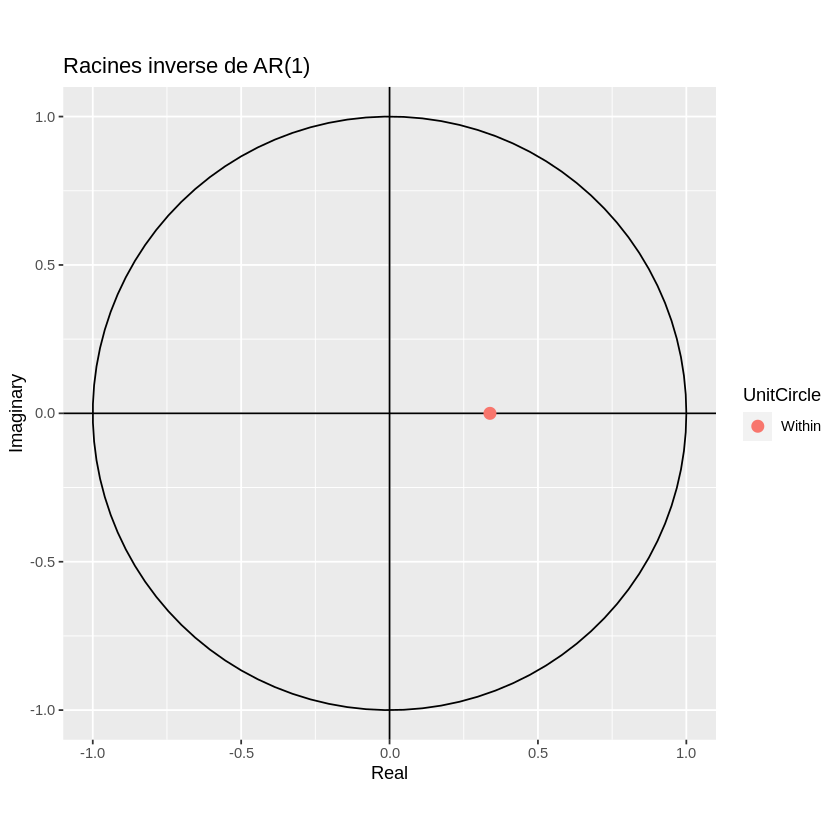

In [ ]:
autoplot(AR1,main="Racines inverse de AR(1)")

La condition est satisfaite.

**Test d'absence d'autocorrélation des résidus Ljung-Box**


$$
\left\lbrace
\begin{array}{l}
H_{0}\,:\,\rho(1)=\rho(2)=\ldots=\rho(10)=0\\
H_{a}\,:\,\exists i\in\left\lbrace 1,\cdots,10 \right\rbrace\,\mathrm{tel\,que}\,\rho(i)\neq 0
\end{array}
\right.
$$


	Ljung-Box test

data:  Residuals from ARIMA(1,0,0) with non-zero mean
Q* = 5.5354, df = 9, p-value = 0.7854

Model df: 1.   Total lags used: 10



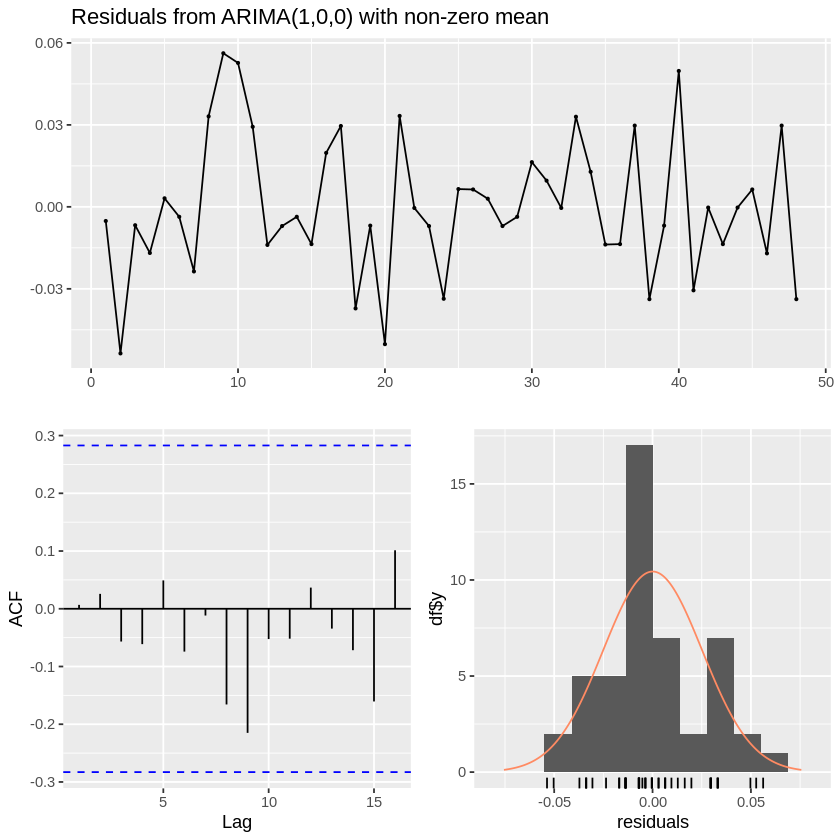

In [ ]:
test_resAR1<-checkresiduals(AR1,lag = 10)

* L'autocorrélogramme nous permet de voir qu'aucune des autocorrélations n'est significativement différente de 0. En effet, toutes les autocorrélations sont situées dans les bornes de l'intervalle de confiance à 95\% .

* La statistique de test de Ljung-Box est égale à $Q*(10) = 5.5354$.
    + Sous $H_{0}$, $LB\_stat$ suit une loi $\chi^{2}(10-3) = \chi^{2}(7)$.
    + Les seuils critiques sont donc tirés de la loi $\chi^{2}(7)$ :
        + $Q^{*}(10)_{0.90}=12.02$ pour un risque de première espèce de 10%
        + $Q^{*}(10)_{0.95}=14.07$ pour un risque de première espèce de 5%
        + $Q^{*}(10)_{0.99}=18.48$ pour un risque de première espèce de 1%
    + $Q*(10) = 5.5354$  est inférieure à ces seuils critiques. On ne rejette pas l'hypothèse nulle d'absence d'autocorrélation des résidus pour un risque de première espèce de 1%.
    + La condition d'absence d'autocorrélation des résidus est alors satisfaite. Nous notons toutefois que notre p-value = 0.7854 donc nos résultats ne sont pas significatifs.
"

Warning message in trainingaccuracy(object, test, d, D):
“test elements must be within sample”



Call:
stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, include.mean = include.mean, 
    transform.pars = transform.pars, fixed = fixed, init = init, method = method, 
    n.cond = n.cond, optim.control = optim.control, kappa = kappa)

Coefficients:
         ar1  intercept
      0.3205     0.0263
s.e.  0.1332     0.0051

sigma^2 estimated as 0.0006192:  log likelihood = 115.95,  aic = -225.9

Training set error measures:
              ME RMSE MAE MPE MAPE
Training set NaN  NaN NaN NaN  NaN

NULL

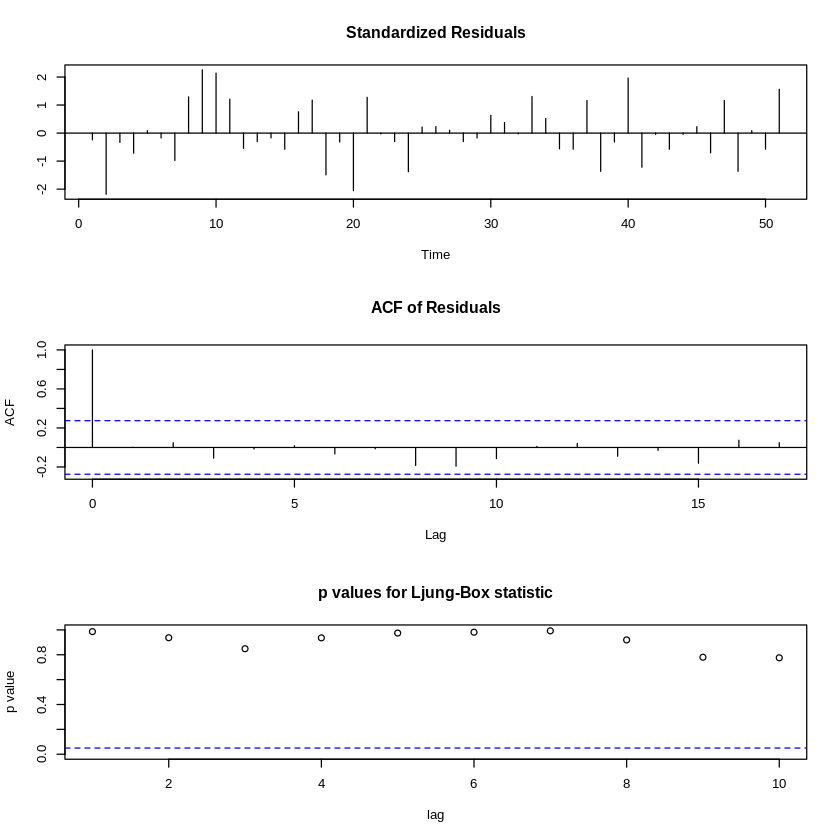

In [ ]:
library(FinTS)
AR1LB <- ARIMA(x =r_logCERp$rlogCERp,order=c(1,0,0),type=c("Ljung-Box"))
summary(AR1LB)
AR1$Box.test
tsdiag(AR1LB)

**Test de l'hypothèse de normalité des résidus de Jarque et Bera**

Les hypothèses du test sont :

$$
\left\lbrace
\begin{array}{l}
H_ {0}:\,S(X)=0\;et\;K(X)=3\\
H_ {1}:\,S(X)\neq 0\; ou\;K(X)\neq 3
\end{array}
\right.
$$

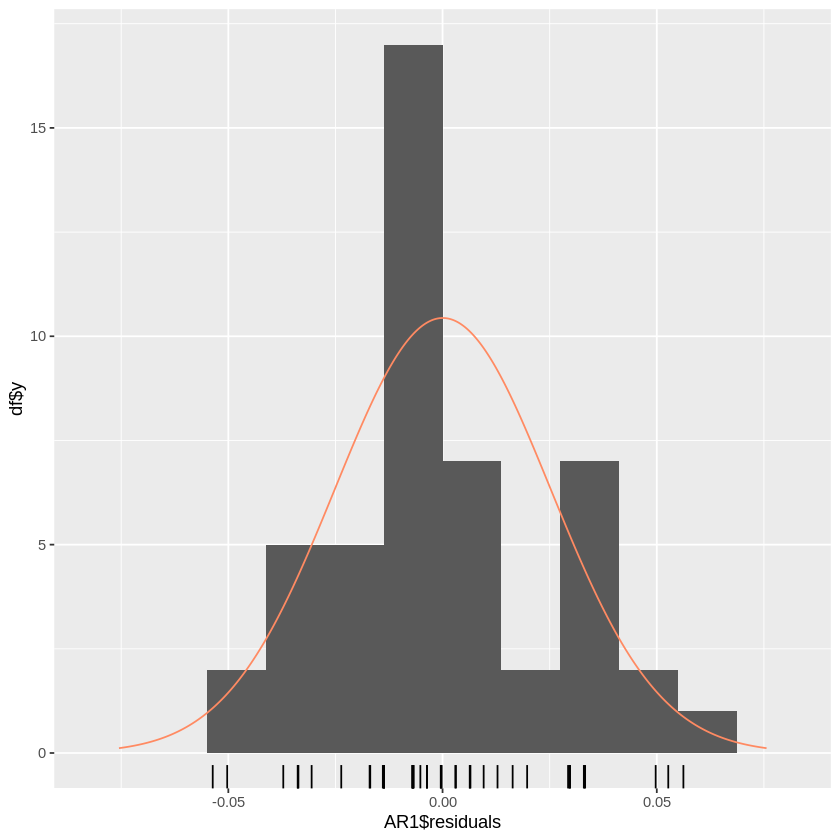

In [ ]:
gghistogram(AR1$residuals, add.normal = TRUE)

**Commentaires:**
L'histogramme des résidus ne semble pas s'aligner avec la courbe de la loi normale (moyenne des résidus, écart-type des résidus). Vérifions si nous satisfaisons tout de même la condition.

In [ ]:
install.packages("moments")
library(moments)
sprintf("Skewness des residus : %f",skewness(AR1$residuals))
sprintf("kurtosis des residus : %f",kurtosis(AR1$residuals))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] "Skewness des residus : 0.210911"

[1] "kurtosis des residus : 2.844960"

**Commentaires:**
*  Le skewness estimé des résidus (=0.210911) est proche de 0
*  Le kurtosis estimé des résidus (=2.844960) est proche de 3




In [ ]:
library(tseries)
jarque.bera.test(AR1$residuals)


	Jarque Bera Test

data:  AR1$residuals
X-squared = 0.40394, df = 2, p-value = 0.8171


**Commentaires:**
* La statistique du test de Jarque et Bera est égale à  est $JB\_{stat}$ = 0.40394.
* Sous $H_{0}$, $JB\_{stat}$ suit une loi $\chi^{2}(2)$.
* Les seuils critiques sont :
    + $\chi^{2}_{0.90}(2)=4.61$ pour un risque de première espèce de 10%
    + $\chi^{2}_{0.95}(2)=5.99$ pour un risque de première espèce de 5%
    + $\chi^{2}_{0.99}(2)=9.21$ pour un risque de première espèce de 1%
    
* $JB\_{stat}$ = 0.40394 est inferieure aux seuils critiques pour des risques de première espèce de 1%, 5% et 10\% : on ne rejette pas l'hypothèse d'une loi normale pour les résidus. Donc on a bien une loi normale.
* La condition est satisfaite.

**Test d'absence d'effet GARCH de Engle et Granger**



On teste l'hypothèse d'absence d'effet ARCH avec deux retards.

La régression estimée est :

$$
\hat{u}_{t}^{2}= \gamma_{0} + \gamma_{1} \hat{u}_{t-1}^{2} +\gamma_{2} \hat{u}_{t-2}^{2}  + \epsilon_{t}
$$


Les hypothèses du test sont :

$$
\left\{
\begin{array}{ll}
H_{0} : \gamma_{1}=\gamma_{2}=0 \Rightarrow \,pas\,d'effet\,ARCH\\
H_{a} : \gamma_{1}\neq 0\, ou  \gamma_{2} \neq 0 \Rightarrow effet\,ARCH
\end{array}
\right.
$$

In [ ]:
library(FinTS)
ArchTest(AR1$residuals,lags=2,demean = FALSE)


	ARCH LM-test; Null hypothesis: no ARCH effects

data:  AR1$residuals
Chi-squared = 3.637, df = 2, p-value = 0.1623


* La statistique de test est $ARCH\_stat = 3.637$.
* Sous $H_{0}$, $ARCH\_stat$ suit une loi $\chi^{2}(2)$.

Les seuils critiques sont :

$\chi^{2}_{0.90}(2)=4.61$ pour un risque de première espèce de 10%

$\chi^{2}_{0.95}(2)=5.99$ pour un risque de première espèce de 5%

$\chi^{2}_{0.99}(2)=9.21$ pour un risque de première espèce de 1%

*  ARCH\_LM = 3.1637 est inferieur aux seuils critiques : on ne rejette pas l'hypothèse nulle d'absence d'effet ARCH pour les résidus pour les risques de première espèce habituel (1%, 5% et 10%).
Il y a alors homoscédasticité. La condition est satisfaite.


**Conclusion**

Notre modèle satisfait toutes les conditions.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



   Point Forecast       Lo 95      Hi 95
49     0.01687583 -0.03303052 0.06678218
50     0.02258464 -0.03009991 0.07526920
51     0.02451584 -0.02847735 0.07750903

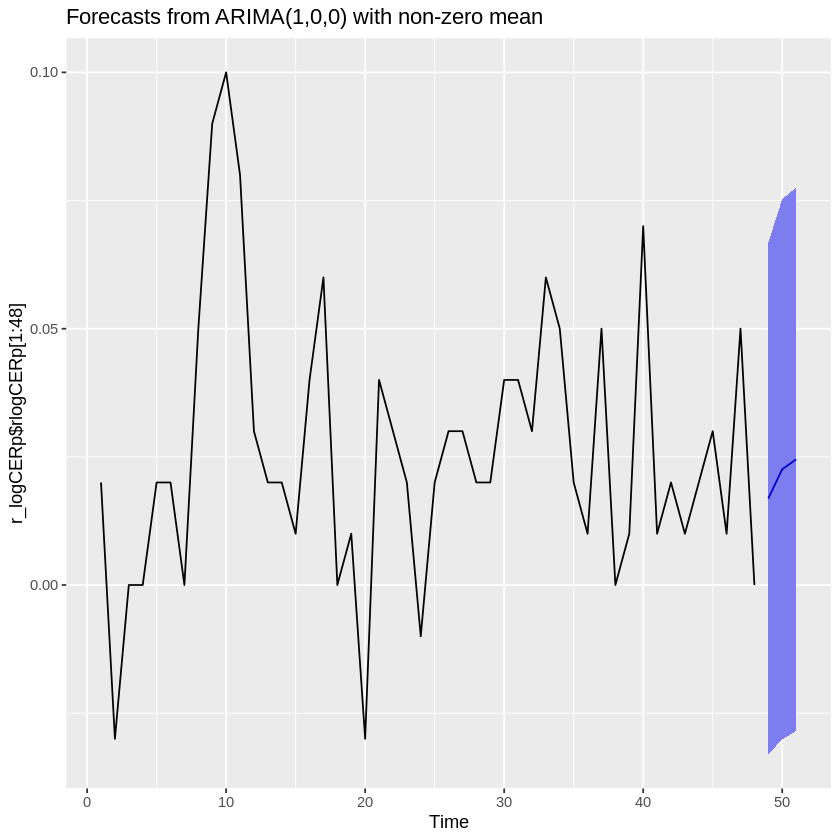

In [ ]:
# Questions 5 : Prévisions
install.packages("forecast")
library(forecast)
forecast_AR1<-forecast(AR1,h=3,level=95)
forecast_AR1
autoplot(forecast_AR1)


$$
\left\lbrace
\begin{array}{l}
Taux\_logCERp_{t} = 0.0255031+\hat{u}_{t}\\
\hat{u}_{t}= 0.3382835\times \hat{u}_{t-1}+\hat{\epsilon}_{t}
\end{array}
\right.
$$

$$
\begin{aligned}
\Rightarrow Taux\_logCERp_{t} - 0.0255031 &= 0.33822835\times(Taux\_logCERp_{t-1} - 0.0255031) +\hat{\epsilon}_{t}\\
\Rightarrow Taux\_logCERp_{t}  &= 0.33822835\times(Taux\_CERp_{t-1} - 0.0255031) + 0.0255031 +\hat{\epsilon}_{t}\\
\Rightarrow Taux\_logCERp_{t} &  = (1 - 0.33822835)\times 0.0255031+ 0.33822835\times Taux\_logCERp_{t-1} +\hat{\epsilon}_{t}\\
\Rightarrow Taux\_logCERp_{t} &= 0.016877+ 0.33822835\times Taux\_logCERp_{t-1} +\hat{\epsilon}_{t}
\end{aligned}
$$

**Valeurs réelles en 2017 et 2018**

In [ ]:
tail(forecast_AR1$mean,n=3)
tail(r_logCERp[47:48,])

A Time Series:
[1] 0.01687583 0.02258464 0.02451584

,annees,rlogCERp
,<int>,<dbl>
47,2017,0.05
48,2018,0.00


Les prévisions ne vont dépendre que de la dernière valeur passée.

**Valeurs de nos prévisions H={1,2,3}**

**H=1** : $Taux\_logCERp_{2019}= 0.016877+ 0.33822835\times Taux\_logCERp_{2018} +\hat{\epsilon}_{t}$

$Taux\_logCERp_{2018}= 0.016877+ 0.33822835\times0=0.016877$

**H=2** : $Taux\_logCERp_{2020}= 0.016877+ 0.33822835\times Taux\_logCERp_{2019} +\hat{\epsilon}_{t}$

$Taux\_logCERp_{2020}= 0.016877+ 0.33822835\times0.016877=0.022585$

**H=3** : $Taux\_logCERp_{2021}= 0.016877+ 0.33822835\times Taux\_logCERp_{2020} +\hat{\epsilon}_{t}$

$Taux\_logCERp_{2021}= 0.016877+ 0.33822835\times0.022585=0.0245158$

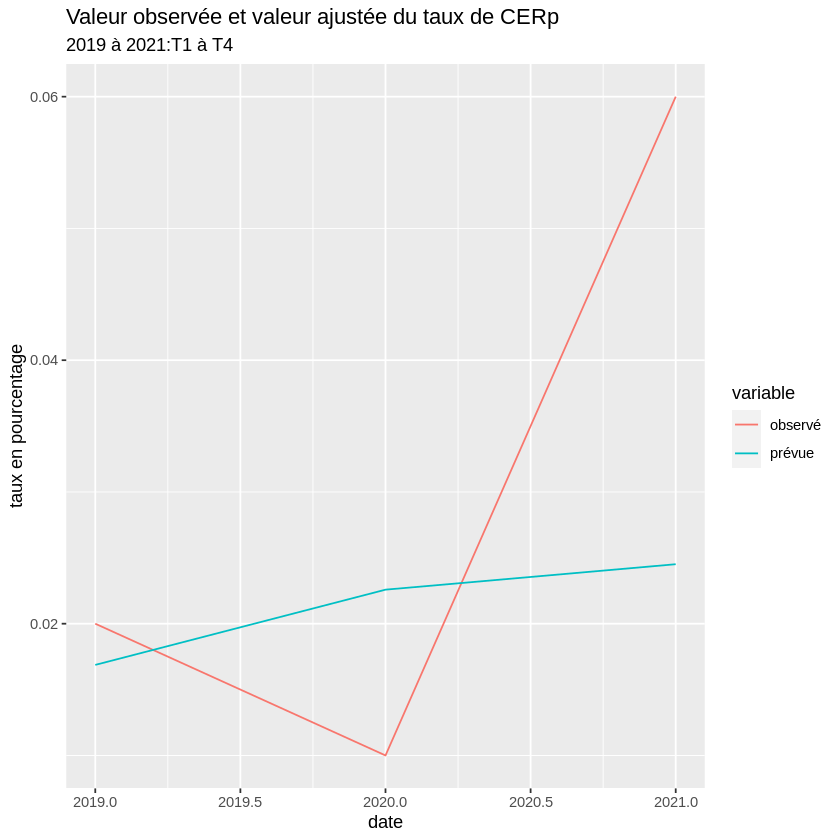

In [ ]:
prev <-data.frame(r_logCERp$annees[49:51],r_logCERp$rlogCERp[49:51],as.matrix(forecast_AR1$mean))

colnames(prev)<-c("date","observé","prévue")


data_F_melt=melt(as.data.frame(prev),id.vars = 1)

g_rlogCERp<-ggplot(data=data_F_melt,aes(x=date))+geom_line(aes(x=date,y=value,color= variable))
g_rlogCERp+labs(y="taux en pourcentage",title = "Valeur observée et valeur ajustée du taux de CERp",
            subtitle = "2019 à 2021:T1 à T4")

**Commentaires** : Nos prévisions ne semblent pas parfaitement correspondre aux variables observéese mais semblent se fondrent dans l'intervalle de confiance à 95% des valeurs prévues. Par ailleurs, nos valeurs calculées plus haut à chaque horizon semblent correspondre à celles prévues sur le graphique (en bleu) pour 2019, 2020 et 2021.

In [ ]:
install.packages("Metrics")
library(Metrics)
sprintf("MAE out of sample %f",mae(prev$observé,prev$prévue))
sprintf("RMSE out of sample %f",rmse(prev$observé,prev$prévue))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy




[1] "MAE out of sample 0.017064"

[1] "RMSE out of sample 0.021812"

**Commentaires** : Nos MAE et RMSE sont assez faibles. Ceci veut dire que nous avons assez bonne adéquation entre les prédictions et les observations.

##Conclusion Partie 1
Les variables utilisées étant non stationnaires comme l′indiquent les corrélogrammes et les tests de racine unitaire appliqués à ces séries, nous avons donc transformé ces variables pour les rendre stationnaires. Nous avons commencé alors par transformer les séries en logarithme. Ensuite, nous avons transformé ces données en différence première, dans le but de nous permettre d′interpréter ces variables en termes de croissance.
Nos séries semblent indiquer qu′elles sont stationnaires en différence première. En effet, la tendance paraît éliminée puisqu′il n′y a plus de structure particulière comme nous pouvons le constater d′après le corrélogramme des trois séries. Afin de vérifier cela, nous procédons aux tests de racine unitaire en appliquant les trois tests de Dikey-Fuller (ADF), de Phillips-Perron (PP) et de Kwiatkowski, Phillips, Schmidt et Shin (KPSS).
Tous les tests de racine unitaire aboutissent au même résultat : nos séries deviennent stationnaires après avoir pris la différence première. Nous concluons alors que toutes les séries sont I(1), c′est-à-dire intégrées d′ordre 1 à un niveau de significativité de 5 %.
\
\
Nous avons ensuité étudié la série temporelle stationnarisée correspondante à la Contribution d'énergie renouvellable à l'approvisionnement total en énergie primaire au Danemark (rlogCERp). Nous avons modéliser notre série avec un AR1 et nous avons ensuite tenté de voir si ce modèle nous permettait d'avoir de bonnes prévisions. Les prévisions n'ont pas été parfaites mais semblent assez bonnes pour un risque de première espèce à 5%.

# Partie 2

## Modèle VAR


In [ ]:
allseries <- Reduce(function(x, y) merge(x, y, by = "annees", all = TRUE),
                    list(r_logemCO2, r_logCERp))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




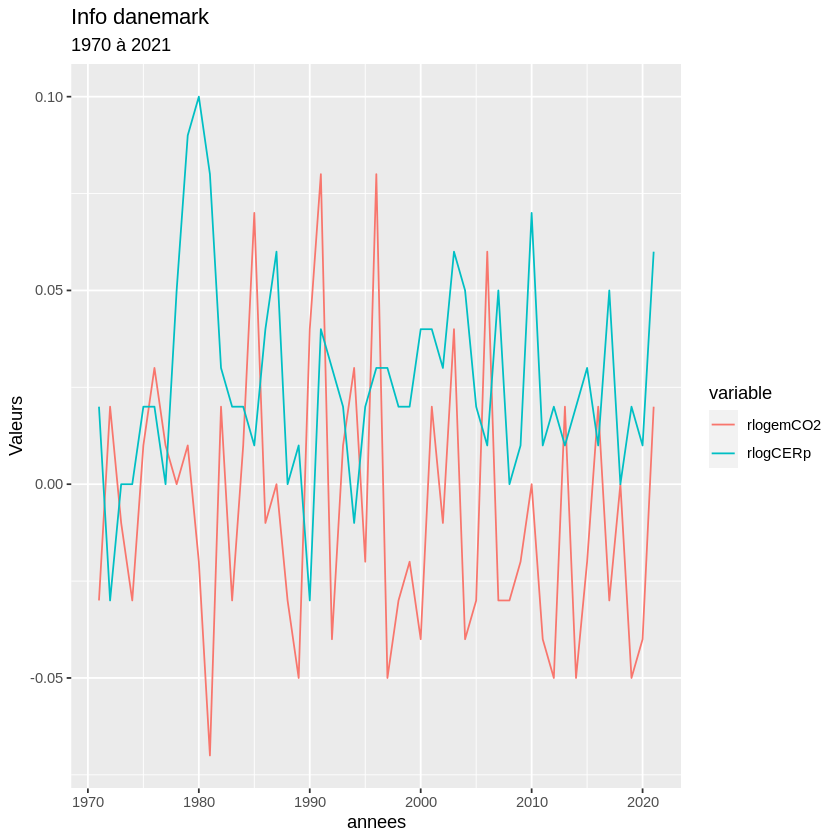

In [ ]:
install.packages("reshape2")
library(ggplot2)
library(reshape2)
data_melt=melt(as.data.frame(allseries),id.vars = 1)
graphallseries<-ggplot(data=data_melt,aes(x=annees))+geom_line(aes(x=annees,y=value,color=variable))
graphallseries+labs(y="Valeurs",title = "Info danemark",
subtitle = "1970 à 2021")

In [ ]:
summary(allseries)

     annees       rlogemCO2            rlogCERp       
 Min.   :1971   Min.   :-0.070000   Min.   :-0.03000  
 1st Qu.:1984   1st Qu.:-0.030000   1st Qu.: 0.01000  
 Median :1996   Median :-0.010000   Median : 0.02000  
 Mean   :1996   Mean   :-0.006275   Mean   : 0.02608  
 3rd Qu.:2008   3rd Qu.: 0.020000   3rd Qu.: 0.04000  
 Max.   :2021   Max.   : 0.080000   Max.   : 0.10000  

In [ ]:
sapply(allseries,sd)

annees   rlogemCO2    rlogCERp 
14.86606875  0.03549427  0.02653891



*   Les valeurs des moyennes, des variances et des écart-type sont toutes assez différentes entre rlogemCO2 et rlogCERp.
*   L'écart-type est plus important pour le taux de croissance des émissions de CO2 que pour le taux de croissance de la Contribution des énergies renouvelables à l'approvisionnement total en énergie primaire au Danemark






**Dans cette première partie, nous nous concentrerons sur les variables présentent dans notre première partie : rlogCERp et rlogemCO2.**

In [ ]:
#Question 6

install.packages("vars")
library(vars)
pselect<-VARselect(y=allseries[,c(2,3)],lag.max=12,type=c("const"))
pselect$criteria

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘strucchange’, ‘sandwich’


Loading required package: MASS

Loading required package: strucchange

Loading required package: sandwich

Loading required package: urca

Loading required package: lmtest



,1,2,3,4,5,6,7,8,9,10,11,12
AIC(n),-1.421374e+01,-1.414231e+01,-1.420438e+01,-1.428578e+01,-1.411817e+01,-1.395433e+01,-1.381684e+01,-1.377545e+01,-1.394748e+01,-1.395636e+01,-1.436858e+01,-1.421763e+01
HQ(n),-1.412191e+01,-1.398927e+01,-1.399012e+01,-1.401031e+01,-1.378147e+01,-1.355642e+01,-1.335771e+01,-1.325510e+01,-1.336592e+01,-1.331358e+01,-1.366458e+01,-1.345241e+01
SC(n),-1.395781e+01,-1.371576e+01,-1.360720e+01,-1.351799e+01,-1.317975e+01,-1.284529e+01,-1.253718e+01,-1.232517e+01,-1.232658e+01,-1.216483e+01,-1.240643e+01,-1.208486e+01
FPE(n),6.719185e-07,7.232783e-07,6.831738e-07,6.354996e-07,7.624418e-07,9.177221e-07,1.085532e-06,1.179495e-06,1.049939e-06,1.119910e-06,8.163179e-07,1.076196e-06


In [ ]:
pselect$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
    11      1      1      4

**Commentaires** : Nous choisissons un retard à 1 comme c'est le retard minimal. Notamment, étant donné que nous avons peu d'observations (au nombre de 51 suite aux différenciations qui nous ont fait perdre toutes les premières observations, au départ nous en avions 52), choisir un retard trop important entrainera une perte de degré de liberté, une réduction du nombre de données disponible et donc un appauvrissement de l'estimation.
Cela semble alors être cohérent avec la question 4 dans laquelle nous avions obtenu un AR1.

Nous estimerons un modèle VAR(1) tel que:

 $X_t = (rlogemCO2_t,rlogCERp_t)'$
\
\
Comme toutes les séries présentent dans notre vecteur $X_t$ sont stationnaires nous aurons un modèle VAR(1) du type :  

$X_t = c + β_1X_{t-1} +ϵ_t $

In [ ]:
# Lien du modèle var(1) à la main
print("https://drive.google.com/file/d/1g8j2WTMfQgYveK7RxoviRN-Zgqnqsnkt/view?usp=sharing")

Les résultats de l'estimation sont alors :

In [ ]:
var1lag <- VAR(y = allseries[, c("rlogemCO2", "rlogCERp")], type = "const", lag.max = 1)
summary(var1lag)


VAR Estimation Results:
Endogenous variables: rlogemCO2, rlogCERp 
Deterministic variables: const 
Sample size: 50 
Log Likelihood: 213.633 
Roots of the characteristic polynomial:
0.1883 0.01931
Call:
VAR(y = allseries[, c("rlogemCO2", "rlogCERp")], type = "const", 
    lag.max = 1)


Estimation results for equation rlogemCO2: 
rlogemCO2 = rlogemCO2.l1 + rlogCERp.l1 + const 

              Estimate Std. Error t value Pr(>|t|)  
rlogemCO2.l1 -0.192562   0.140667  -1.369   0.1775  
rlogCERp.l1  -0.344309   0.190278  -1.810   0.0768 .
const         0.001636   0.006873   0.238   0.8129  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.03479 on 47 degrees of freedom
Multiple R-Squared: 0.08856,	Adjusted R-squared: 0.04978 
F-statistic: 2.283 on 2 and 47 DF,  p-value: 0.1131 


Estimation results for equation rlogCERp: 
rlogCERp = rlogemCO2.l1 + rlogCERp.l1 + const 

             Estimate Std. Error t value Pr(>|t|)    
rlogemCO2.l1 0.191634 

**Commentaires** :

rlogemCO2.l1 correspond à rlogemCO2 avec un retard de 1 période et rlogCERp.l1 correspons à rlogCERp avec un retard de 1 période

**Equation de rlogemCO2**

* Le coefficient de rlogemCERp.l1 est significatif et négatif pour un risque de première espèce à 10%. Ceci veut dire qu'une hausse du taux de croissance de CERp à la date t-1 va impacter négativement le taux de croissance des émissions de CO2 à la date t.
Autrement dit, une hausse de l'utilisation des énergies renouvelables à la date t-1 réduirait les émissions de CO2 à la date t. Ce qui semble cohérent.
* Le coefficient de rlogemCO2.l1 et la constante ne sont, quant à eux, pas significatifs.
* Le R2 est environ égal à 5% (0.0497) : les variables explicatives n'expliquent que 5% des variations de rlogemCO2.


**Equation de rlogCERp**

* Le coefficient de rlogemCO2.l1 est significatif et positif pour un risque de première espèce à 10%. Ceci voudrait dire que le taux de croissance des émissions de CO2 à la date t-1 augmenterait le taux de croissance de la contribution de l'energie renouvelable à l'approvisionnement total d'énergie primaire à la date t. Cela paraît cohérent au sens où, si plus les émisisons augmentent, plus on va faire en sorte de les réduire, par exemple en augmentant l'utilisation des énergies renouvelables.
* Le coefficient de rlogCERp.l1 est significatif et positif pour un risque de première espèce à 5%. Ainsi, il semblerait que plus le taux de croissance de la CERp est grande à t-1, plus elle le sera à t.
Cela peut s'expliquer par une volonté croissante d'accumuler l'utilisation d'énergies renouvelables.
* L'impact de rlogCERp.l1 (0.3615) est supérieur à l'impact de rlogemCO2.l1 (0.1916).
* La constante = 0.0183 a un effet significatif positif pour un risque de première espèce à 0.1%.





In [ ]:
## Portmanteau Test (adjusted)
serial.test(var1lag, lags.pt = 2, type = "PT.adjusted")


	Portmanteau Test (adjusted)

data:  Residuals of VAR object var1lag
Chi-squared = 6.0875, df = 4, p-value = 0.1927

$serial

	Portmanteau Test (adjusted)

data:  Residuals of VAR object var1lag
Chi-squared = 6.0875, df = 4, p-value = 0.1927



**Commentaires** :

Le test de Portmanteau permet de tester  l'autocorrélation des erreurs (qui généralement biaise les estimateurs).

Les hypothèses de test sont :

* H0 : absence d'autocorrélation significative dans les résidus jusqu'au retard 2

* H1 : présence d'autocorrélation significative dans les résidus jusqu'au retard 2

$0.05 < p-value = 0.1927$

La condition d'absence d'autocorrélation des erreurs est satisfaite pour un risque de première espèce de 5%.



In [ ]:
#Racines
roots(var1lag)


[1] 0.18828047 0.01931199

**Commentaires** : La condition de stationnarité satisfaite comme les modules des inverses des racines sont bien inferieurs à 1.

**Variable ajustée du taux de croissance du log des émissions de CO2**

In [ ]:
plot(var1lag$varresult$rlogemCO2$fitted.values,type='line',col='blue')

**Variable ajustée du taux de croissance du log du CERp**

In [ ]:
plot(var1lag$varresult$rlogCERp$fitted.values,type='line',col='blue')

**Commentaires sur les graphiques des variables ajustées** :
Si nous observons les deux graphiques précédent, il semblerait qu'ils soient symétriques. Cela au sens où, lorsque le taux de croissance de la contribution de l'énergie renouvelable à l'approvisionnement totale d'energie primaire (rlogCERp) est fort, le taux de croissance des émissions de CO2 (rlogemCO2) est proportionnellement faible à la même date. Inversement, quand rlogCERp est faible, rlogemCO2 est proportionnellement élevé.
\
\
Cela paraît cohérent si nous nous disons que augmenter la part d'énergie renouvelable réduit la part d'énergie fossile dans l'approvisionnement total d'énergie primaire. Ce qui réduirait donc les émissions de CO2. Ces graphiques semblent cohérent avec l'estimation de notre VAR(1).
\
\
Toutefois ce ne sont que des suppositions. Il est important de distinguer la corrélation d'un effet de causalité. Nous tenterons alors de voir dans ce qui suit, quelle variable cause quelle variable ?

In [ ]:
cor.test(allseries$rlogemCO2,allseries$rlogCERp)

**Commentaires** : Toutefois, le test de Pearson soutient que la corrélation  négative (r = -0.1116) entre nos deux taux de croissance n'est pas très significative (p-value = 0.4357). Cela étant dommage, nous poursuivons tout de même notre analyse.

**Estimation finale de notre modèle VAR(1)**

Etant donné que toutes les conditions sont satisfaites et que rlogCERp et rlogemCO2 sont stationnaires, nous pouvons désormais estimer notre modèle VAR(1).

Ici nous avons donc rlogemCO2 en première ligne et rlogCERp en deuxième. Nous verrons suite aux tests de causalité de Granger si nous devons changer l'ordre de classement de nos variables dans la matrice.

##Test de causalité au sens de Granger

Nous tenterons de voir si une variable cause une autre variable.

**Causalité de la CERp sur les émissions de CO2**

Les hypothèses du test sont :

$$
\left\{
\begin{array}{ll}
H_{0} : {a_{12}^1}=0 \Rightarrow \ rlogCERp\ ne\ cause\ pas\ rlogemCO2\\
H_{a} :  {a_{12}^1}\neq0\, \Rightarrow rlogCERp\ cause\ rlogemCO2
\end{array}
\right.
$$


In [ ]:
#Question 7
causality(var1lag,cause=c('rlogCERp'))

$Granger

	Granger causality H0: rlogCERp do not Granger-cause rlogemCO2

data:  VAR object var1lag
F-Test = 3.2743, df1 = 1, df2 = 94, p-value = 0.07357


$Instant

	H0: No instantaneous causality between: rlogCERp and rlogemCO2

data:  VAR object var1lag
Chi-squared = 0.0026671, df = 1, p-value = 0.9588



**Commentaires** :
Pour un risque de première espèce à 5%, on ne parvient pas à rejeter H0 et donc rlogCERp ne cause pas rlogemCO2 (mais pour un risque de première espèce à 10% si).



**Causalité des emissions de CO2 sur la CERp**

Les hypothèses du test sont :

$$
\left\{
\begin{array}{ll}
H_{0} : {a_{21}^1}=0 \Rightarrow \ rlogemCO2\ ne\ cause\ pas\ rlogCERp\\
H_{a} :  {a_{21}^1}\neq0\, \Rightarrow rlogemCO2\ cause\ rlogCERp
\end{array}
\right.
$$

In [ ]:
causality(var1lag,cause=c('rlogemCO2'))

$Granger

	Granger causality H0: rlogemCO2 do not Granger-cause rlogCERp

data:  VAR object var1lag
F-Test = 3.6041, df1 = 1, df2 = 94, p-value = 0.06071


$Instant

	H0: No instantaneous causality between: rlogemCO2 and rlogCERp

data:  VAR object var1lag
Chi-squared = 0.0026671, df = 1, p-value = 0.9588



**Commentaires** :
Pour un risque de première espèce à 5%, on ne parvient pas à rejeter H0 et donc rlogemCO2 ne cause pas rlogeCERp (mais pour un risque de première espèce à 10% si).


**Conclusion**

* Pour un risque de première espèce à 10%, on a un effet de causalité inverse (ou effet feedback).
* Pour un risque de première espèce à 5%, aucune des variables , n'impacte l'autre.
\
\
Ainsi, dans les deux cas, la position des séries temporelles dans la matrice $X_t$ n'a pas d'importance. **De même, l'ordre n'aura pas d'importance dans la décomposition de Cholesky**

##Fonctions impulsion-réponse

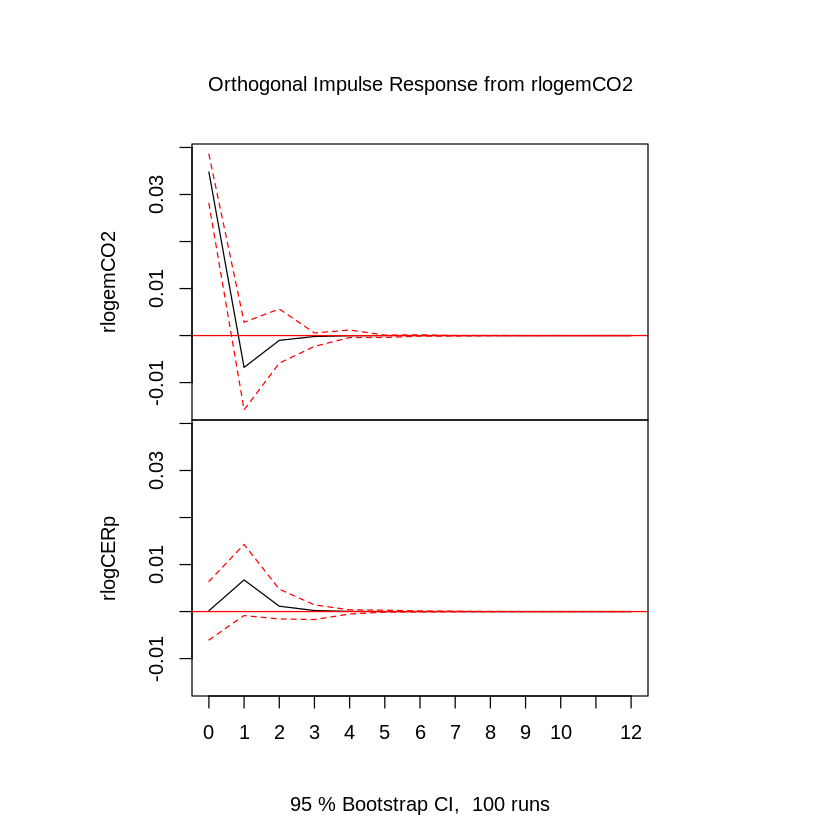

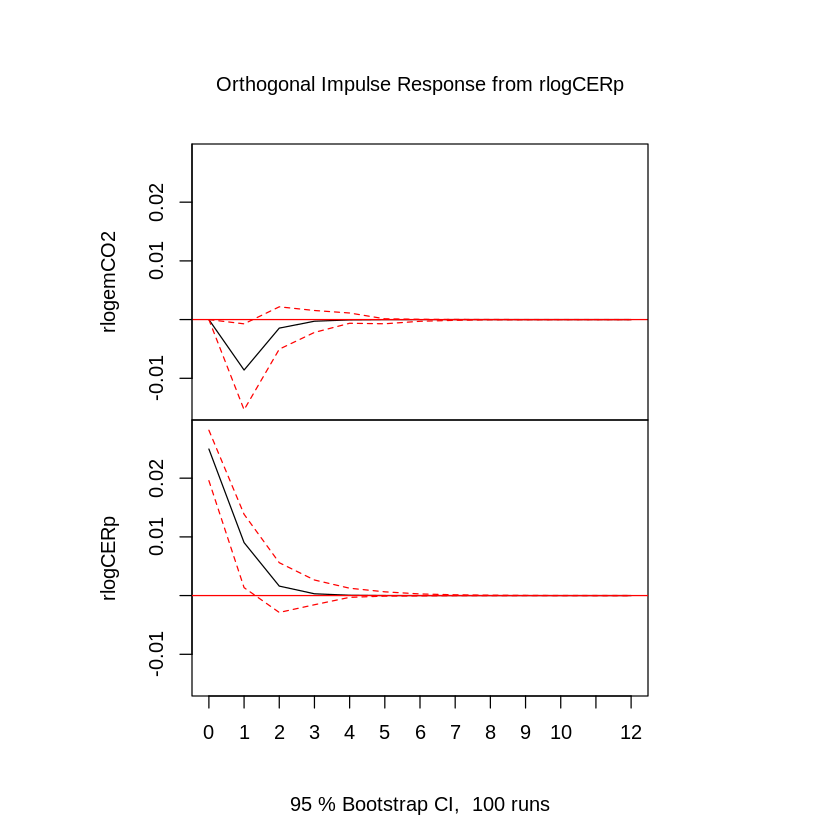

In [ ]:
irf<-irf(var1lag,n.ahead = 12,ortho = TRUE,ci=0.95)
plot(irf)

**Commentaires** :

**Effet d'un choc sur rlogemCO2**

Le premier graphique nous permet d'analyser les réponses de rlogCERp a un choc positif sur rlogemCO2
*   Pas d'effet immédiat sur rlogCERp
*   Mais un effet positif sur rlogCERp à l'horizon 1

**Effet d'un choc sur rlogCERp**

Le second graphique nous permet d'analyser les réponses de logemCO2 à un choc positif sur rlogCERp
*   Pas d'effet immédiat sur rlogemCO2
*   Mais un effet négatif sur rlogemCO2 à l'horizon 1

\

Cela paraît cohérent avec tout ce que nous avons dit plus tôt.

Une augmentation du taux de croissance des émissions de CO2 à t-1  entraînera une augmentation du taux de croissance de l'utilisation de l'énergie renouvelable au Danemark au temps t.

Ensuite, une augmentation du rlogCERp (taux de croissance de la part de l'énergie renouvelable au Danemark) à t-1 entraînera une diminution du rlogemCO2 (taux de croissance des émissions de CO2) à t.






# Estimation des IRF par la méthode VAR

In [ ]:
# Lien vers l'estimation des IRF par la méthode VAR fait à la main à partir de l'estimation IRF plus haut
print("https://drive.google.com/file/d/169xdLIxBChAqVSHri3mRGEC-YFoCKrqS/view?usp=sharing")

[1] "https://drive.google.com/file/d/169xdLIxBChAqVSHri3mRGEC-YFoCKrqS/view?usp=sharing"


Les valeurs utilisées sont toutes celles présentes dans l'estimation du VAR(1) du début de la partie 2.

##Estimation des IRF par la méthode des projections locales

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[[1]]
NULL


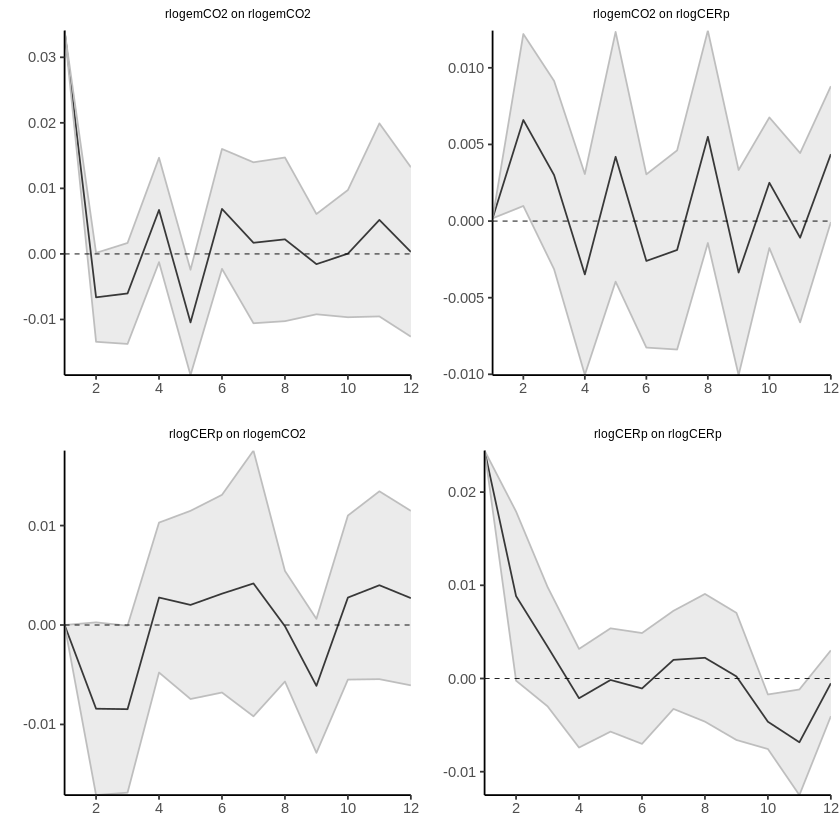

In [ ]:
# Question 8
install.packages("lpirfs")
library(lpirfs)
irf_PL <-lp_lin(endog_data = allseries[, c(2, 3)],
lags_endog_lin = NaN,
lags_criterion = 'BIC',
max_lags = 8,
trend = 0,
shock_type = 0,
confint=1.96,
hor=12,
adjust_se=TRUE)

plot(irf_PL)

**Commentaires** :


1.  **(haut-gauche)** : les chocs subits par rlogemCO2 se font subir pendant les 2 premières années qui suivent sur rlogemCO2 même, puis les effets se stabilisent dans le temps
2.  **(haut-droit)**  : rlogCERp réagit assez rapidement aux chocs subits par rlogemCO2 mais pas instantannément. Nous avons par ailleurs l'impression que l'effet est saisonnier et alterne entre des effets positifs et négatifs (environ tous les ans). En moyenne  on pourrait peut-être dire qu'il n'y a pas trop d'effets.
3.  **(bas-gauche)** : les chocs subits par rlogCERp se font ressentir sur rlogemCO2 pendant les 3 premières années mais pas instantannément. Les effets se stabilisent ensuite avec le temps.
4.  **(bas-droit)** : les chocs subits par rlogCERp se font ressentir sur les valeurs de rlogCERp-même dans les 3-4 premières années qui suivent, puis les effets se stabilisent dans le temps

**Remarque importante** : Nous retrouvons bien les chocs structurels estimés dans le modèle VAR (étape précédente).
* Choc structurel sur rlogemCO2 $= 0.035$
* Choc structurel sur rlogCERp $= 0.025$


In [ ]:
# Valeurs des IRF pour les chocs sur rlogemcO2
irf_PL$irf_lin_mean[,,1]

0.0340737730,-0.006622812,-0.006029504,0.006709285,-0.010450931,0.006867746,0.001700766,0.002226231,-0.001560542,4.677268e-05,0.005188992,0.0003020923,0.006329112
0.0001785873,0.006594246,0.002999297,-0.003481488,0.004193004,-0.002602403,-0.001885864,0.005498093,-0.003359774,2.499437e-03,-0.001086715,0.0043669079,-0.003314474


In [ ]:
## Valeurs des IRF pour les chocs sur rlogCERp
irf_PL$irf_lin_mean[,,2]

0.00000000,-0.008418763,-0.008463526,0.002760891,0.0020201596,0.003151361,0.004179219,-0.0001217387,-0.0061188069,0.002759873,0.004000456,0.0027041480,0.002252719
0.02445121,0.008839865,0.003419161,-0.002116453,-0.0001593741,-0.001068279,0.001999697,0.0022218232,0.0002213655,-0.004639447,-0.006843126,-0.0005119869,-0.001229532


In [ ]:
# Nombre de retards optimal inclut dans la projection locale en fonction des horizons
irf_PL$specs$chosen_lags


**Décomposition de la variance**

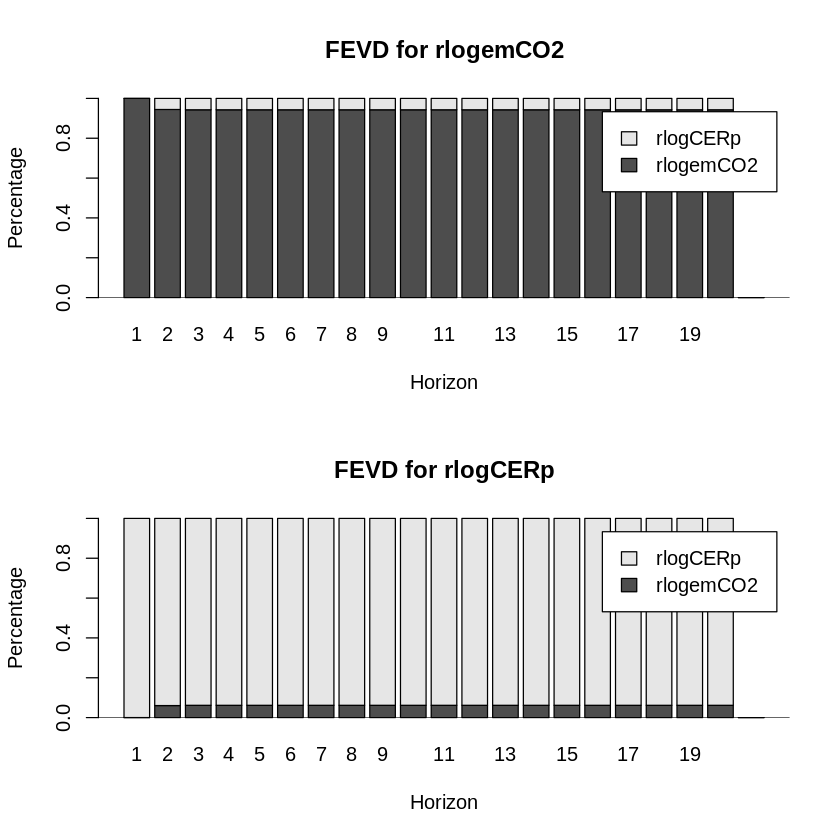

In [ ]:
dec_var <-fevd(var1lag,n.ahead=20)
plot(dec_var)


**Commentaires** :

*   rlogemCO2 est impacté par son propre choc
*   A la première période, l'entièrete de la variance de rlogemCO2 ne dépend que de rlogemCO2
*   A partir de la deuxième période, rlogCERp a un effet mais il restera toujours assez faible et à l'air de rester constant au fil des périodes



\
*  rlogCERp est impacté par son propre choc
* A la première période, l'entièrete de la variance de rlogCERp ne dépend que de rlogCERp
* A partir de la deuxième période, rlogemCO2 a un effet mais il restera toujours assez faible  et à l'air de rester constant au fil des périodes



# Cointégration

Il est pertinent de vérifier l'existence d'une relation de cointégration entre nos deux séries en niveaux (logCERp et logemCO2) étant données qu'elles ont toutes les deux été différenciées une fois. Elles sont toutes les deux I(1). Nous chercherons donc a voir s'il est possible d'exprimer nos seux séries par une combinaison linéaire que l'on intégrera ensuite une fois.

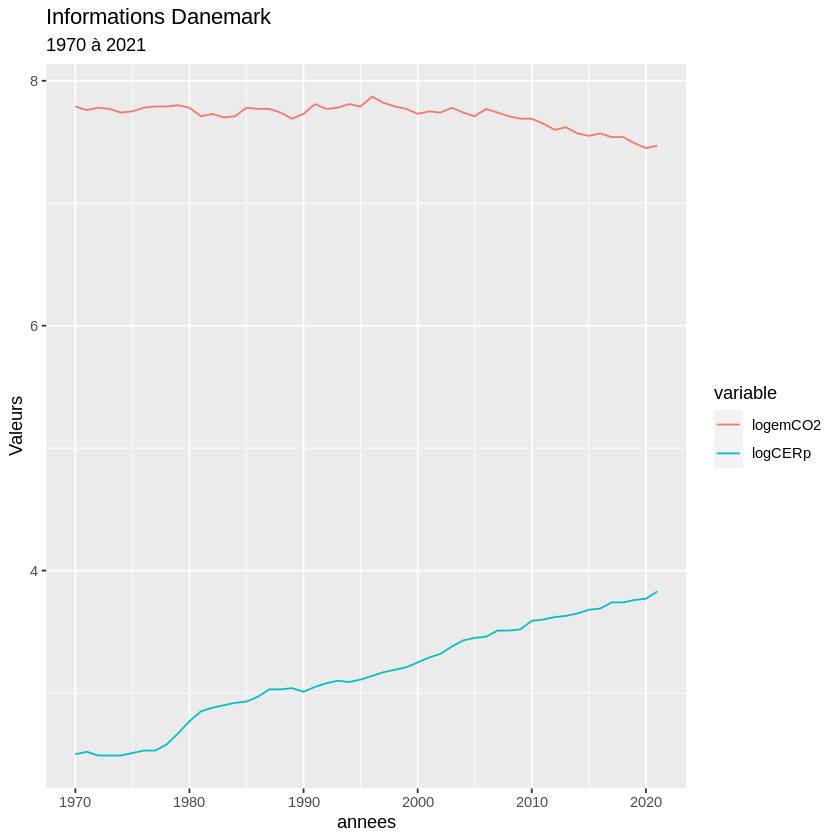

In [ ]:
library(ggplot2)
library(reshape2)

var_coint <- datadenmark2[, c("annees","logemCO2", "logCERp")]
data_melt <- melt(as.data.frame(var_coint), id.vars = "annees")

graph_coint <- ggplot(data = data_melt, aes(x = annees, y = value, color = variable)) +
  geom_line() +
  labs(y = "Valeurs", title = "Informations Danemark", subtitle = "1970 à 2021")

print(graph_coint)

Nous avons vu précédémment dans la partie 1 de ce projet que les séries logemCO2 et logCERp étaient des processus DS. Respectivement le premier sans dérive et le second avec dérive. Pour la suite, nous inclurons une constante dans la relation de cointégration.

**Test de cointégration de Johansen**

In [ ]:
#Détermination du nombre de retards pour notre test
library(vars)
df_emCO2_CERp <- var_coint[,c('logemCO2','logCERp')]
pselect3 <- VARselect(y=df_emCO2_CERp, lag.max=12, type=c("const"))
pselect3

,1,2,3,4,5,6,7,8,9,10,11,12
AIC(n),-1.427368e+01,-1.422787e+01,-1.424536e+01,-1.424295e+01,-1.430201e+01,-1.414279e+01,-1.399838e+01,-1.382266e+01,-1.432266e+01,-1.431265e+01,-1.430048e+01,-1.440363e+01
HQ(n),-1.418208e+01,-1.407521e+01,-1.403163e+01,-1.396816e+01,-1.396615e+01,-1.374587e+01,-1.354039e+01,-1.330361e+01,-1.374255e+01,-1.367147e+01,-1.359824e+01,-1.364033e+01
SC(n),-1.402035e+01,-1.380565e+01,-1.365425e+01,-1.348296e+01,-1.337312e+01,-1.304502e+01,-1.273172e+01,-1.238712e+01,-1.271823e+01,-1.253932e+01,-1.235827e+01,-1.229253e+01
FPE(n),6.327974e-07,6.638268e-07,6.553632e-07,6.624712e-07,6.329030e-07,7.570194e-07,8.994677e-07,1.114004e-06,7.109731e-07,7.677690e-07,8.477875e-07,8.560303e-07


In [ ]:
pselect3$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
    12      1      1      1

Le critère AIC a tendance à surestimer le nombre de retard lorsque le nombre d'observations est élevé. Nous pensons à prendre un retard optimal à 1. Toutefois dans le test de la trace K doit être au minimum être égal à 2. Or le retard qui minimise HQ, SC, FPE après 1 est 2. Nous prenons donc un retard optimal à 2.

In [ ]:
# Test de la trace
library(urca)
emCO2_CERp.vecm<-ca.jo(df_emCO2_CERp,ecdet = "const",spec = "transitory",type = 'trace',K=2)
summary(emCO2_CERp.vecm)


###################### 
# Johansen-Procedure # 
###################### 

Test type: trace statistic , without linear trend and constant in cointegration 

Eigenvalues (lambda):
[1] 2.292696e-01 7.132176e-02 3.246084e-16

Values of teststatistic and critical values of test:

          test 10pct  5pct  1pct
r <= 1 |  3.70  7.52  9.24 12.97
r = 0  | 16.72 17.85 19.96 24.60

Eigenvectors, normalised to first column:
(These are the cointegration relations)

            logemCO2.l1 logCERp.l1    constant
logemCO2.l1  1.00000000  1.0000000  1.00000000
logCERp.l1   0.07470864  0.6815193  0.09780538
constant    -8.96903064 -9.8580645 -8.00898420

Weights W:
(This is the loading matrix)

            logemCO2.l1   logCERp.l1     constant
logemCO2.d -0.001452625 -0.041162110 2.242975e-14
logCERp.d  -0.017876069  0.001457122 2.653243e-14


Les hypothèses du test sont :
$$\left\lbrace\begin{array}{l} H_{0}\,:\,r=rang(Π)=0\\
H_{a}\,:\,r = rang(Π)=1
\end{array} \right.$$

La statistique du test de la valeur propre maximale :
$Q(0/1) = -Tln(1-{λ}̂ _i)=16.72$


$Q(0/1) > 15.67$ (la valeur citique pour un risque de première espèce de 5%).

Nous rejettons donc H0 : "il y a 0 relations de cointégration".

Par la suite, les hypothèses de test sont:

$$\left\lbrace\begin{array}{l} H_{0}\,:\,r=rang(Π)=1\\
H_{a}\,:\,r = rang(Π)=2
\end{array} \right.$$

La statistique de test de la valeur propre maximale : $Q(1/2) = -Tln(1-{λ}̂ _i)=3.70$


$Q(1/2) < 15.67$ (la valeur critique pour un risque de première espèce de 5%).

Nous ne rejettons donc pas H0 : "il y a 1 relation de cointégration".

Nous pouvons alors conclure en disant que nous avons une relation de cointégration entre logemCO2 et logCERp.

**Remarque** : Nous pouvoir avoir qu'une seule cointégration au maximum car nous ne possédons que 2 variables (nombre de cointégration max = 2 -1 = 1).

**Estimation du VECM avec relation de cointégration**

In [ ]:
estim_vecm<-cajorls(emCO2_CERp.vecm,r=1)
summary(estim_vecm$rlm)

Response logemCO2.d :

Call:
lm(formula = logemCO2.d ~ ect1 + logemCO2.dl1 + logCERp.dl1 - 
    1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.057196 -0.023803 -0.000711  0.020721  0.081610 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
ect1         -0.001453   0.006679  -0.217   0.8288  
logemCO2.dl1 -0.191330   0.141102  -1.356   0.1816  
logCERp.dl1  -0.340576   0.186994  -1.821   0.0749 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03479 on 47 degrees of freedom
Multiple R-squared:  0.1123,	Adjusted R-squared:  0.05564 
F-statistic: 1.982 on 3 and 47 DF,  p-value: 0.1295


Response logCERp.d :

Call:
lm(formula = logCERp.d ~ ect1 + logemCO2.dl1 + logCERp.dl1 - 
    1, data = data.mat)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.049455 -0.013580 -0.001058  0.014911  0.053714 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
ect1  

**Commentaires** :

Rappel : L'ect est le terme de correction d'erreur. Il permet de déterminer si une variable dépendante met du temps avant de tendre vers l'équilibre de long terme entre les variables cointégrées.

**Equation de logemCO2.d** (logemCO2 différencié une fois)

* ect1 a un coefficient qui n'est pas significatif. La relation de cointégration n'a alors pas d'effet sur l'évolution de logemCO2.d
* Le coefficient de logemCO2.dl1 n'est pas significatif.
* Le coefficient de logCERp.dl1 est significatif et négatif (-0.34) à un risque de première espèce à 10%.
Ceci revient à dire qu'une augmentation du taux de croissance de logCERp entraînerait une diminution du taux de croissance des émissions de CO2. Cela paraît cohérent avec tous nos résultats précédents.
* Le R2 est environ égal à 5% (0.0497) : les variables explicatives n'expliquent que 5% des variations de logemCO2.d.


**Equation de logCERp.d** (logCERp différencié une fois)

* Le coefficient de ect1 est significatif et négatif (-0.018) pour un risque de première espèce à 0.1%. La relation de cointégration a un effet sur l'évolution de logCERp.d.
Ceci veut dire que dans une situation où ect est positif (alors -0.018ect <0), la valeur de logCERp en t-1 sera supérieure à sa valeur de long terme.

* Le coefficient de logemCO2.dl1  est significatif et positif (0.0208) pour un risque de première espèce à 5%. Ainsi, il semblerait que plus le taux de croissance des émissions de CO2 est élevé, plus le taux de croissance de la part de l'énergie renouvelable dans l'approvisionnement total en énergie primaire sera élevée.

* Le coefficient de logCERp.dl1 est significat et positif pour un risque de première espèce à 1%.





Sous forme de graphiques, nos VECM :

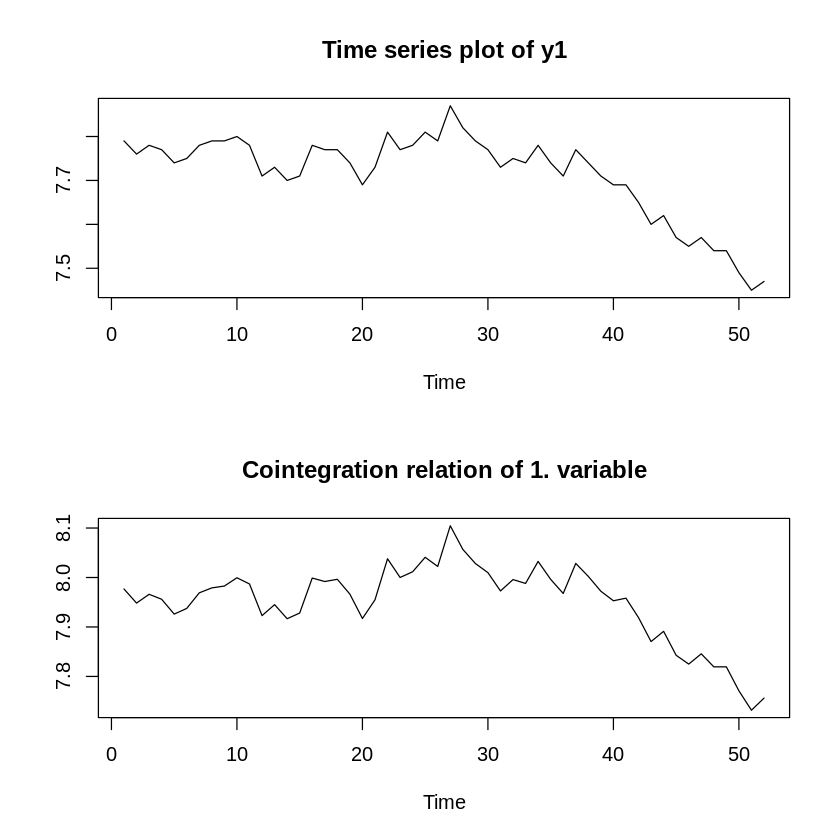

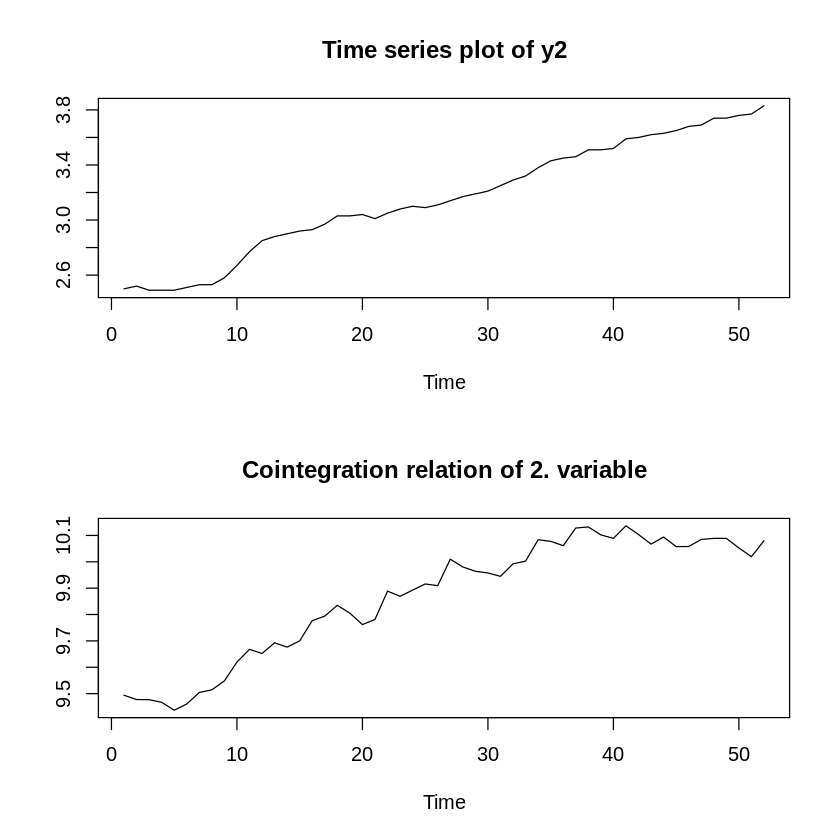

In [ ]:
plot(emCO2_CERp.vecm)


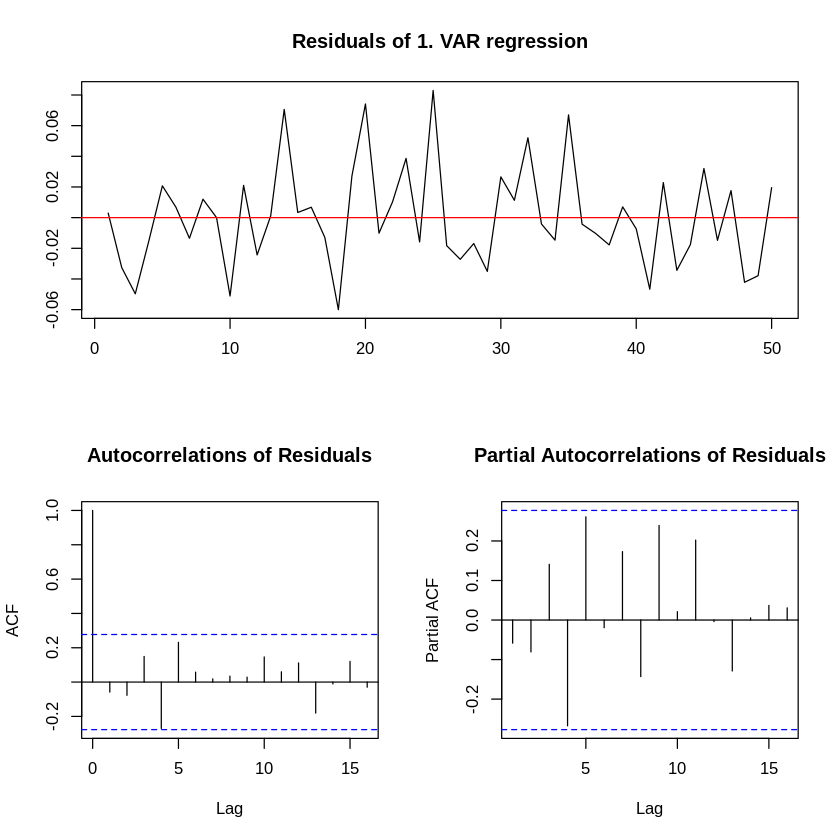

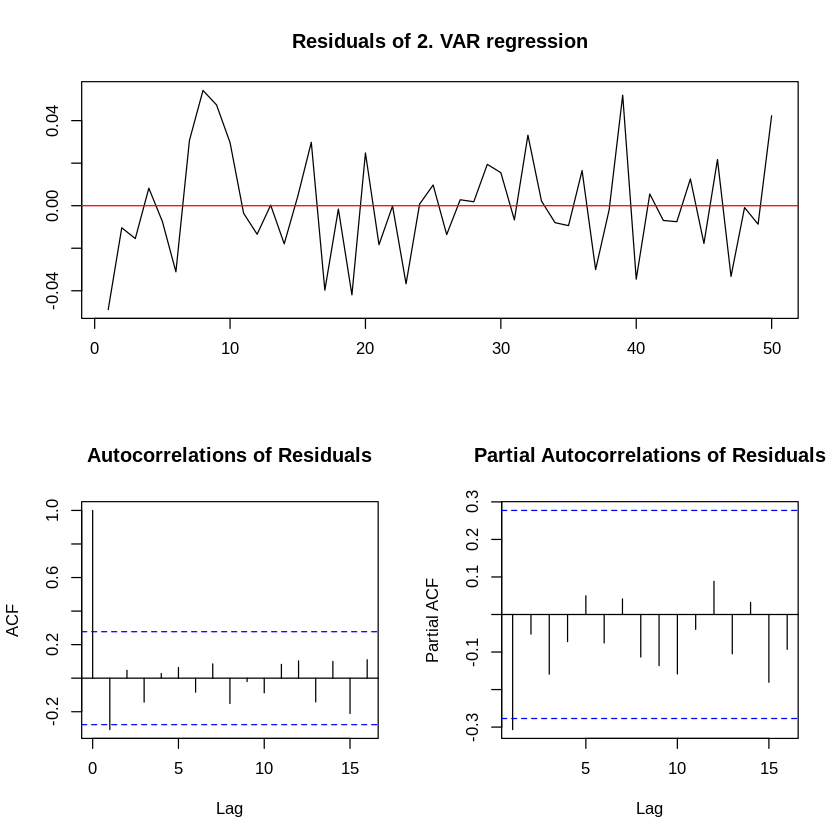

In [ ]:
plotres(emCO2_CERp.vecm)

**Commentaires** : Nos résidus ont l'air de correspondre à un bruit blanc.

**Nous avons vu dans cette première partie qu'on  avait une hausse de l'utilisation des énergies renouvelables au Danemark et une diminution des émissions de CO2. Toutefois, il existe cette traditionnelle idée que les émissions de CO2 sont corrélés au niveau de développement économique d'un pays.Nous tenterons de voir dans cette partie si cette baisse des émissions de CO2 au Danemark a entraîné une baisse du niveau économique danois (mesuré en PIB). Désormais, dans cette seconde partie, nous nous concentrerons sur les variables : rlogemCO2 et logPIB (que nous stationnariserons si la série n'est pas stationnaire) afin d'étudier les effets de causalité qui les lient, s'ils existent.**

##PIB

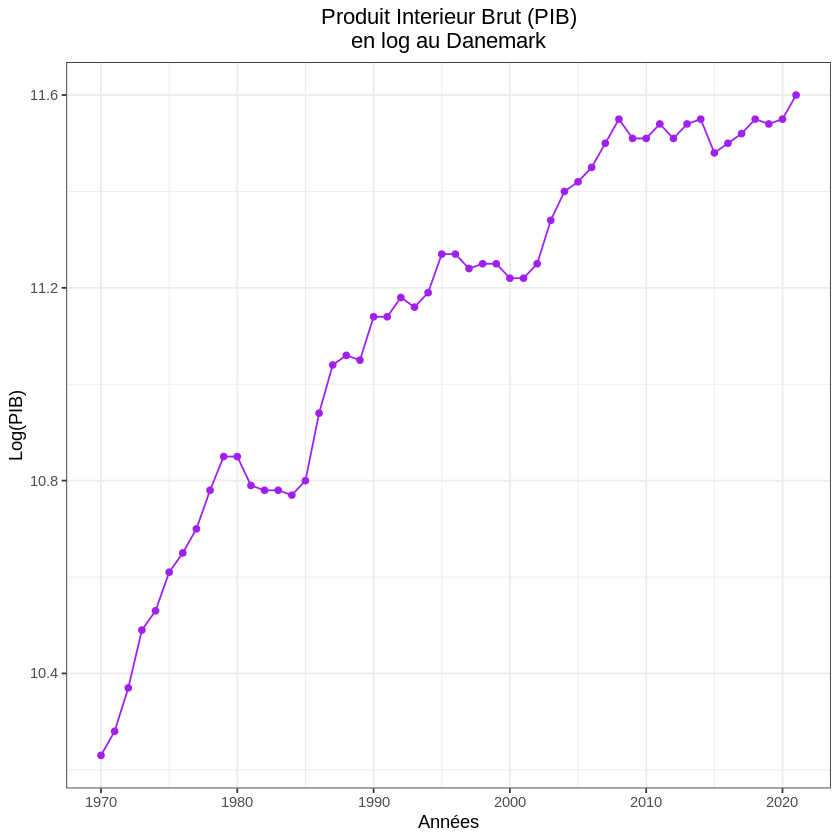

In [ ]:
library(ggplot2)
graphPIB<-ggplot(data=datadenmark2,aes(x=annees,y= logPIB))+geom_point(colour='purple') + geom_line(colour='purple')+ggtitle('Produit Interieur Brut (PIB)
en log au Danemark')+xlab('Années')+ylab('Log(PIB)')+theme_bw()+theme(plot.title = element_text(hjust = 0.5))
graphPIB

**Commentaires:**
Nous observons effectivement qu'entre 1970 et 2021 le PIB en log a augmenté de façon générale au cours des années. A priori, cette série n'est pas stationnaire.

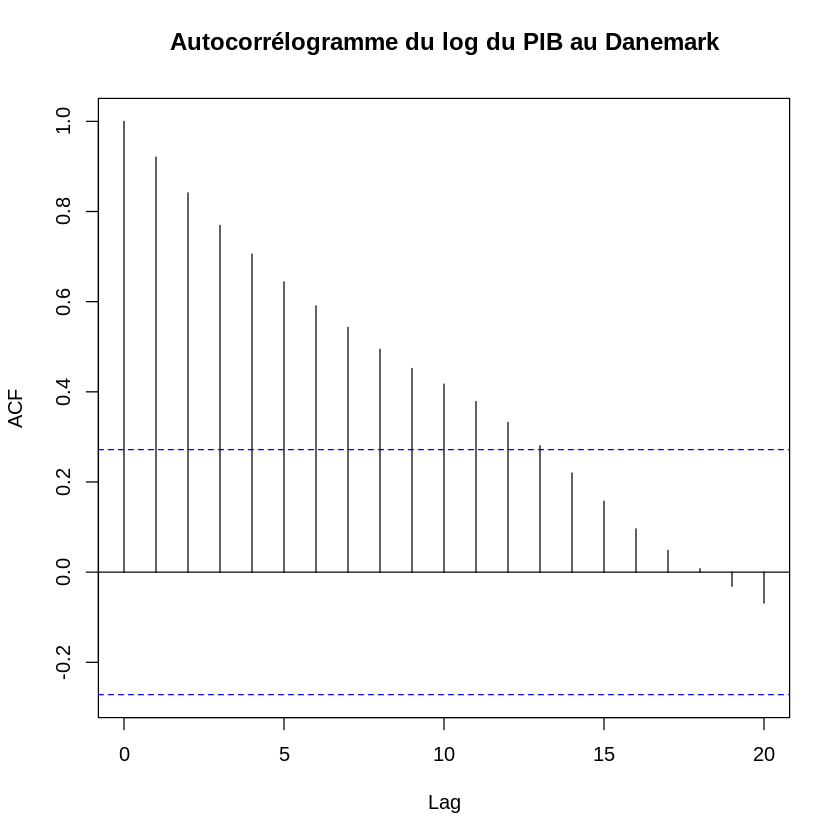

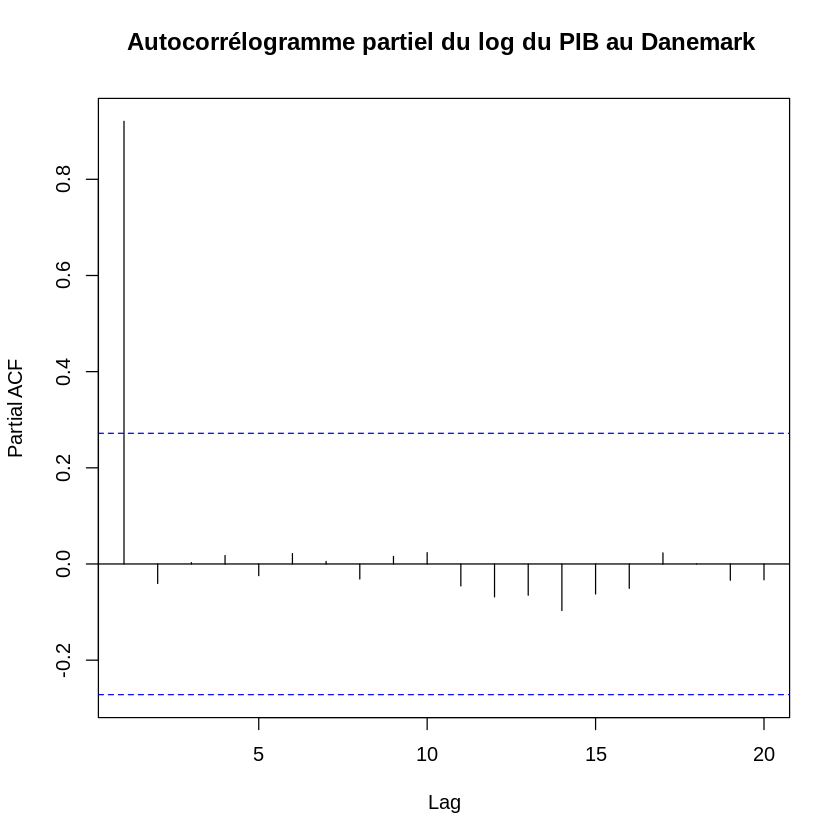

In [ ]:
datadenmark2$logPIB <- as.numeric(datadenmark2$logPIB)
acf(datadenmark2$logPIB, lag.max = 20, main='Autocorrélogramme du log du PIB au Danemark')
pacf(datadenmark2$logPIB, lag.max=20, main='Autocorrélogramme partiel du log du PIB au Danemark ')

**Commentaires** : Les autocorrélations diminuent relativement lentement sur l'ACF (p= 14) et brutalement sur le PACF. Il est possible que notre série soit non-stationnaire.

In [ ]:
library(urca)

# Test regression trend (ADF avec constante et tendance déterministe)
adflogPIB<-ur.df(y = datadenmark2$logPIB,type=c("trend"), lag=14, selectlags = c('AIC'))
summary(adflogPIB)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.07542 -0.02877  0.00193  0.02517  0.05898 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.901912   0.889909   3.261  0.00258 **
z.lag.1     -0.267139   0.083493  -3.200  0.00304 **
tt           0.004153   0.001734   2.396  0.02242 * 
z.diff.lag   0.206815   0.154578   1.338  0.19007   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03658 on 33 degrees of freedom
Multiple R-squared:  0.3132,	Adjusted R-squared:  0.2508 
F-statistic: 5.016 on 3 and 33 DF,  p-value: 0.005644


Value of test-statistic is: -3.1996 7.0701 6.7406 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -4.04 -3.45 -3.15
phi2  6

**Commentaires** :
- $t_{tau3}̂  = -3.1996$ : nous ne pouvons pas rejeter l'hypothèse nulle de racine unitaire aux risques de première espèce à 1% et 5%.
- $t_{Φ2}̂ = 7.0701$ est significatif (valeur du test superieure à la valeur critique) pour tous les seuils de rejets : présence d'une tendance déterministe.
- $t_{Φ3}̂ = 6.7406$ est superieure à la valeur critique pour un risque de première espèces à 10% seulement.

In [ ]:
# Test regression drift (ADF avec constante)
library(urca)
adflogPIB2<-ur.df(y = datadenmark2$logPIB,type=c("drift"), lag=14, selectlags = c('AIC'))
summary(adflogPIB2)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.068529 -0.034092  0.005412  0.032867  0.066659 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.96771    0.33863   2.858  0.00733 **
z.lag.1     -0.08341    0.02986  -2.794  0.00861 **
z.diff.lag1  0.13633    0.15646   0.871  0.38985   
z.diff.lag2 -0.23817    0.15396  -1.547  0.13139   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03827 on 33 degrees of freedom
Multiple R-squared:  0.2483,	Adjusted R-squared:  0.1799 
F-statistic: 3.633 on 3 and 33 DF,  p-value: 0.02276


Value of test-statistic is: -2.7936 8.2145 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.51 -2.89 -2.58
phi1  6.70  4.7

**Commentaires** :
- $t_{tau2}̂  = -2.7936$ : nous ne pouvons pas rejeter l'hypothèse nulle de racine unitaire aux risques de première espèce à 1% et 5%.
- $t_{Φ1}̂ = 8.2145$ est significatif (valeur du test superieure à la valeur critique) pour tous les seuils de rejets : présence d'une constante

In [ ]:
# Test regression none (ADF sans tendance déterministe ni constante)
library(urca)
adflogPIB3<-ur.df(y = datadenmark2$logPIB,type=c("none"), lag=14, selectlags = c('AIC'))
summary(adflogPIB3)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression none 


Call:
lm(formula = z.diff ~ z.lag.1 - 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.090494 -0.031563 -0.002272  0.022026  0.116998 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
z.lag.1    0.0016134  0.0006856   2.353   0.0243 *
z.diff.lag 0.1858906  0.1662379   1.118   0.2711  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0423 on 35 degrees of freedom
Multiple R-squared:  0.2447,	Adjusted R-squared:  0.2015 
F-statistic: 5.669 on 2 and 35 DF,  p-value: 0.007367


Value of test-statistic is: 2.3534 

Critical values for test statistics: 
     1pct  5pct 10pct
tau1 -2.6 -1.95 -1.61


**Commentaires** :
Dans une situation sans constante et sans tendance déterministe, la valeur du test pour tau1 (=2.3534) est supérieure à toutes les valeurs critiques pour les risque des premières espèces de 1%, 5% et 10%. Nous avons surement une racine unitaire.

Passons tout de même par le test KPSS.  

In [ ]:
# Test de KPSS avec constante
test_muKPSSPIB<-ur.kpss(datadenmark2$logPIB,type="mu",lags="short")
summary(test_muKPSSPIB)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 3 lags. 

Value of test-statistic is: 1.3361 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


**Commentaires** : Notre série temporelle ne semble pas être stationnaire autour d'une constante.

In [ ]:
# Test de stationnarité : test de KPSS avec tendance déterministe
test_tauKPSSPIB <- ur.kpss(datadenmark2$logPIB,type="tau")
summary(test_tauKPSSPIB)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 3 lags. 

Value of test-statistic is: 0.2513 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


**Commentaires** : Notre série temporelle ne semble pas être stationnaire autour d'une tendance déterministe ni d'une constante.

**Conclusion**
Il semblerait que nous ayons une série Racine Unitaire sans constante et sans tendance déterministe. Nous pouvons ainsi passer par la différenciation première afin de la stationnariser.

In [ ]:
r_logPIB<-data.frame(datadenmark2$annees[-1],diff(datadenmark2$logPIB))
colnames(r_logPIB)<-c('annees','rlogPIB')

In [ ]:
str(r_logPIB)
head(r_logPIB)

'data.frame':	51 obs. of  2 variables:
 $ annees : int  1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 ...
 $ rlogPIB: num  0.05 0.09 0.12 0.04 0.08 ...


,annees,rlogPIB
,<int>,<dbl>
1,1971,0.05
2,1972,0.09
3,1973,0.12
4,1974,0.04
5,1975,0.08
6,1976,0.04


In [ ]:
install.packages("FinTS")
library(FinTS)
stat_des<-FinTS.stats(r_logPIB$rlogPIB)
stat_des

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in FinTS.stats(r_logPIB$rlogPIB):
“requires(e1071) for skewnessand kurtosis; returning NAs”


Start,Size,Mean,Standard.Deviation,Skewness,Excess.Kurtosis,Minimum,Maximum
<int>,<int>,<dbl>,<dbl>,<lgl>,<lgl>,<dbl>,<dbl>
1,51,0.02686275,0.04433916,NA,NA,-0.07,0.14


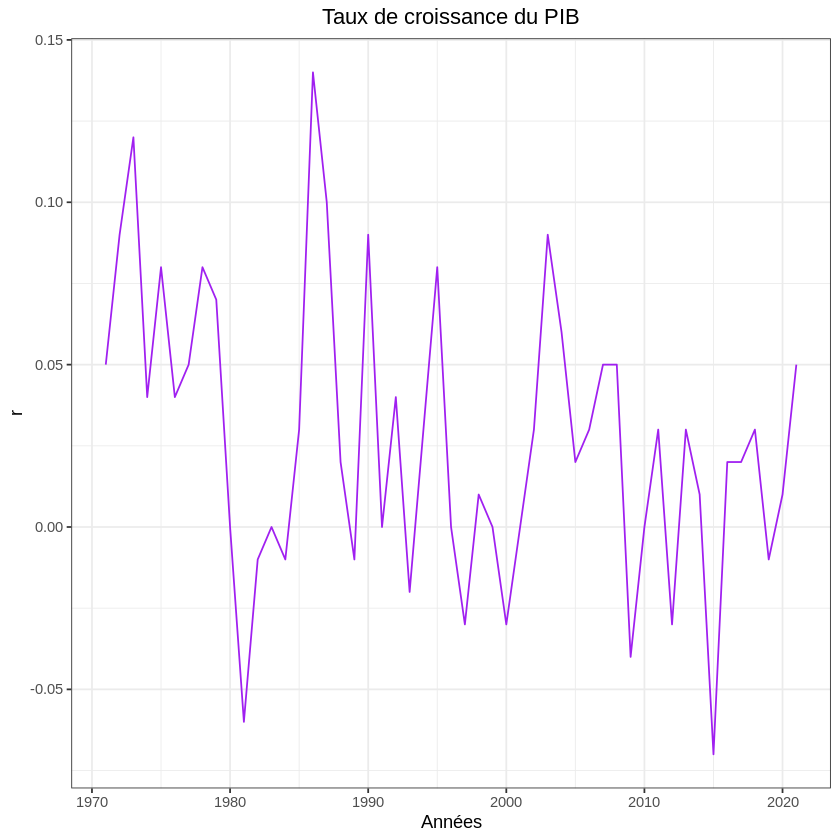

In [ ]:
library(ggplot2)
graphrlogPIB <- ggplot(data = r_logPIB, aes(x = annees, y = rlogPIB)) + geom_line(colour = 'purple') + ggtitle('Taux de croissance du PIB') + xlab('Années') + ylab('r') + theme_bw() + theme(plot.title = element_text(hjust = 0.5))
print(graphrlogPIB)

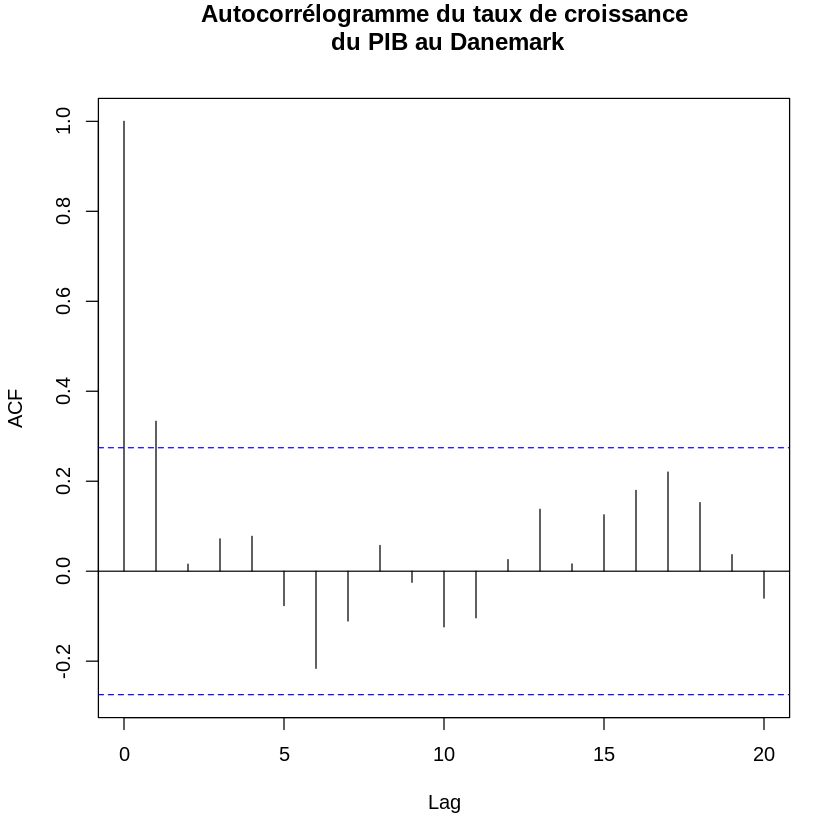

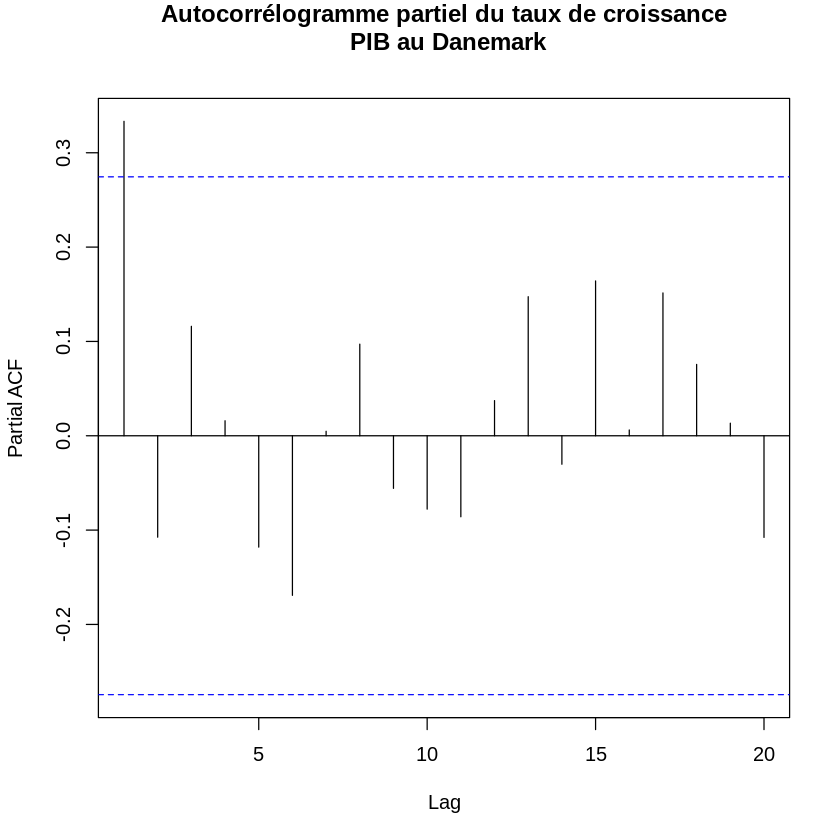

In [ ]:
acf(r_logPIB$rlogPIB, lag.max = 20, main='Autocorrélogramme du taux de croissance
 du PIB au Danemark')
 pacf(r_logPIB$rlogPIB, lag.max = 20, main='Autocorrélogramme partiel du taux de croissance
 PIB au Danemark')

**Conclusion** : Les autocorrélations sur l'ACF diminuent rapidement et les autocorrélations ne sont pas significatives à part la première. rlogPIB est stationnaire.

**Modèle VAR**

In [ ]:
cor.test(allseries$rlogemCO2,allseries$rlogPIB)


	Pearson's product-moment correlation

data:  allseries$rlogemCO2 and allseries$rlogPIB
t = 1.8687, df = 49, p-value = 0.06765
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.01900797  0.49810496
sample estimates:
      cor 
0.2579268 


**Commentaires** : Pour un risque de première espèce à 10%, il existe une corrélation positive (r=0.258) entre rlogemCO2 et rlogPIB. Cela voudrait dire que lorsque le taux de croissance des émissions de CO2 augmente au Danemark, plus le PIB danois est élevé. Toutefois, cela ne veut pas dire qu'il existe une relation de causalité entre ces deux variables. Nous étudierons donc les liens de causalité dans ce qui suit.

In [ ]:
allseries <- Reduce(function(x, y) merge(x, y, by = "annees", all = TRUE),
                    list(r_logemCO2, r_logCERp, r_logPIB))

In [ ]:
library(vars)
pselect3<-VARselect(y=allseries[,c(2,4)],lag.max=12,type=c("const"))
pselect3$criteria

,1,2,3,4,5,6,7,8,9,10,11,12
AIC(n),-1.288582e+01,-1.278705e+01,-1.265187e+01,-1.255716e+01,-1.249375e+01,-1.274168e+01,-1.268253e+01,-1.267828e+01,-1.256278e+01,-1.244419e+01,-1.246168e+01,-1.235095e+01
HQ(n),-1.279400e+01,-1.263400e+01,-1.243761e+01,-1.228168e+01,-1.215705e+01,-1.234376e+01,-1.222340e+01,-1.215793e+01,-1.198121e+01,-1.180141e+01,-1.175768e+01,-1.158573e+01
SC(n),-1.262989e+01,-1.236049e+01,-1.205469e+01,-1.178936e+01,-1.155533e+01,-1.163264e+01,-1.140287e+01,-1.122800e+01,-1.094188e+01,-1.065266e+01,-1.049953e+01,-1.021818e+01
FPE(n),2.535257e-06,2.804713e-06,3.226849e-06,3.579701e-06,3.869765e-06,3.085748e-06,3.374930e-06,3.533397e-06,4.193066e-06,5.080552e-06,5.495575e-06,6.959532e-06


In [ ]:
pselect3$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

**Commentaires**: Nous choisissons un retard à 1.

Nous estimerons un modèle VAR(1) tel que:

 $X_t = (rlogemCO2_t,rlogPIB_t)'$
\
\
Comme toutes les séries présentent dans notre vecteur $X_t$ sont stationnaires nous aurons un modèle VAR(1) du type :  

$X_t = c + β_1X_{t-1} +ϵ_t $

Les résultats de l'estimation sont alors :

In [ ]:
var1lag2 <- VAR(y = allseries[, c("rlogemCO2", "rlogPIB")], type = "const", lag.max = 1)
summary(var1lag2)


VAR Estimation Results:
Endogenous variables: rlogemCO2, rlogPIB 
Deterministic variables: const 
Sample size: 50 
Log Likelihood: 189.208 
Roots of the characteristic polynomial:
0.3001 0.1924
Call:
VAR(y = allseries[, c("rlogemCO2", "rlogPIB")], type = "const", 
    lag.max = 1)


Estimation results for equation rlogemCO2: 
rlogemCO2 = rlogemCO2.l1 + rlogPIB.l1 + const 

              Estimate Std. Error t value Pr(>|t|)
rlogemCO2.l1 -0.170135   0.148837  -1.143    0.259
rlogPIB.l1    0.036864   0.118810   0.310    0.758
const        -0.007930   0.006189  -1.281    0.206


Residual standard error: 0.03595 on 47 degrees of freedom
Multiple R-Squared: 0.02706,	Adjusted R-squared: -0.01434 
F-statistic: 0.6536 on 2 and 47 DF,  p-value: 0.5248 


Estimation results for equation rlogPIB: 
rlogPIB = rlogemCO2.l1 + rlogPIB.l1 + const 

             Estimate Std. Error t value Pr(>|t|)   
rlogemCO2.l1 0.284317   0.173017   1.643  0.10700   
rlogPIB.l1   0.277823   0.138111   2.012  0.05002 

**Commentaires** :

rlogemCO2.l1 correspond à rlogemCO2 avec un retard de 1 période et rlogPIB.l1 correspond à rlogPIB avec un retard de 1 période

**Equation de rlogemCO2**

* Aucun coefficient n'est significatif
* Le R2 est environ égal à R2 = -0.014 qui est une valeur négative.  Cela suggère que le modèle ne parvient pas à capturer la structure de la variance des données. Une des raisons possible à cela serait un surajustement du modèle (le modèle est trop complexe face à une quantité d'information trop faible).
* Il ne semble donc pas que rlogemPIB.l1 ait un impact sur rlogemCO2 dans ce modèle. Toutefois, il peut être intéressant de faire deux remarques. La première est que la p-value n'est même pas significative à un risque de première espèce à 10%, cela veut dire que l'estimqtion de l'équation de rlogemCO2 n'est pas significative. La seconde est que si nous avions pris un plus grand nombre de retard il est possible que ces derniers aient un impact.


**Equation de rlogPIB**

* Le coefficient de rlogemCO2.l1 n'est pas significatif pour un risque de première espèce à 5%. Cela suggère alors que le taux de croissance des émissions de CO2 à la date t-1 n'impacte pas significativement le taux de croissance du PIB à la date t.
* Le coefficient de rlogPIB.l1 n'est pas significatif pour un risque de première espèce à 5% (mais l'est et de façon positive (0.278) pour un risque de première espèce à 10%) .
* La constante = 0.021 a un effet significatif positif pour un risque de première espèce de 1%.


**Conclusion** : Il semble ici que rlogPIB ne va pas avoir d'effet significatif  avec un retard d'une période sur rlogemCO2. Et inversement, rlogemCCO2 ne va pas avoir d'effet significatif  avec un retard d'une période sur rlogPIB.





**Variable ajustée du taux de croissance de log des émissions de CO2**

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


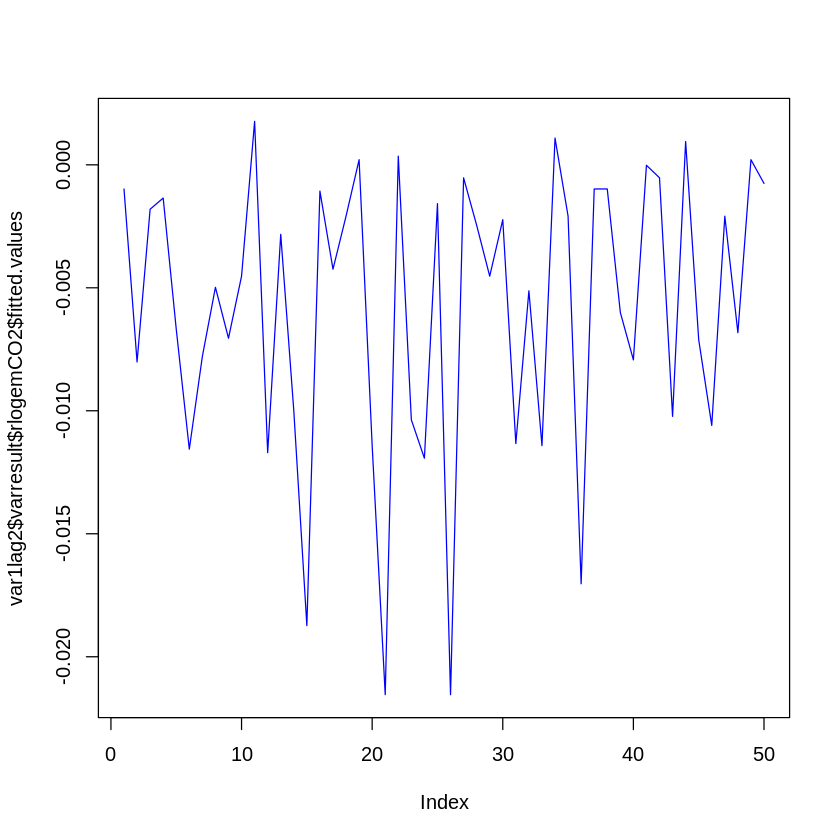

In [ ]:
plot(var1lag2$varresult$rlogemCO2$fitted.values,type='line',col='blue')

**Variable ajustée dy taux de croissance du PIB au Danemark**

Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”


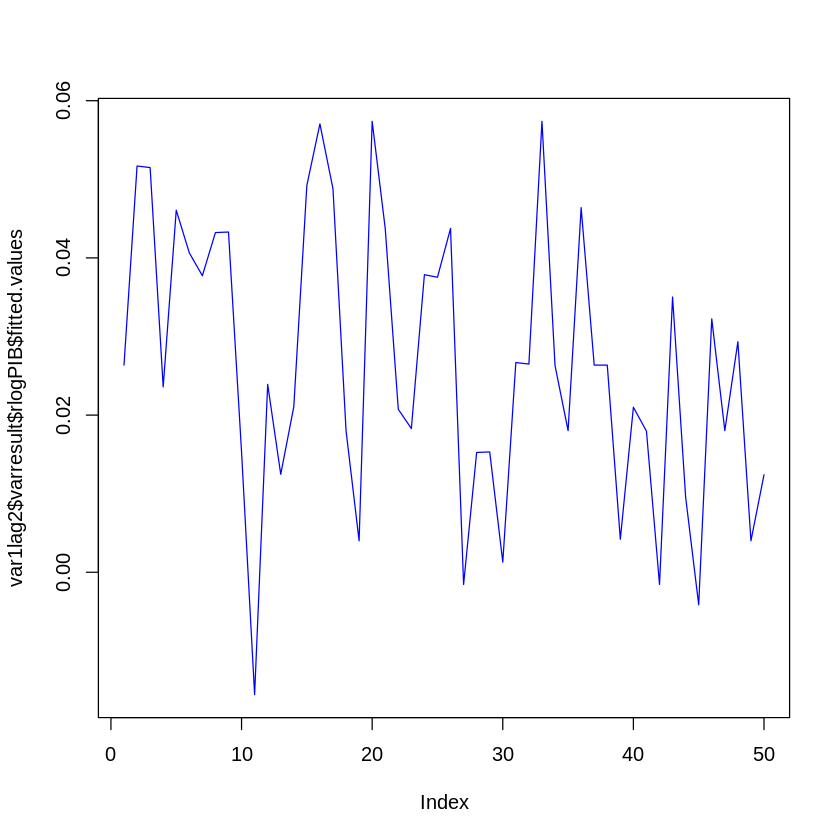

In [ ]:
plot(var1lag2$varresult$rlogPIB$fitted.values,type='line',col='blue')

**Commentaires** : Il est assez difficile de tirer des conclusions en comparant les graphiques des variables ajustées.

## Test de causalité au sens de Granger


**Causalité des émissions de CO2 sur le PIB**

In [ ]:
causality(var1lag2,cause=c('rlogemCO2'))

$Granger

	Granger causality H0: rlogemCO2 do not Granger-cause rlogPIB

data:  VAR object var1lag2
F-Test = 2.7004, df1 = 1, df2 = 94, p-value = 0.1037


$Instant

	H0: No instantaneous causality between: rlogemCO2 and rlogPIB

data:  VAR object var1lag2
Chi-squared = 5.023, df = 1, p-value = 0.02501



**Commentaires** : Nous choisissons un niveau de significativité à 5%.

$p-value = 0.1037 > 0.05$

Nous ne rejettons donc pas H0.

Le taux de croissance des émissions de CO2 ne cause pas au sens de Granger le taux de croissance du PIB.

**Causalité du PIB sur les émissions de CO2**

In [ ]:
causality(var1lag2,cause=c('rlogPIB'))

$Granger

	Granger causality H0: rlogPIB do not Granger-cause rlogemCO2

data:  VAR object var1lag2
F-Test = 0.096274, df1 = 1, df2 = 94, p-value = 0.757


$Instant

	H0: No instantaneous causality between: rlogPIB and rlogemCO2

data:  VAR object var1lag2
Chi-squared = 5.023, df = 1, p-value = 0.02501



**Commentaires** : Nous choisissons un niveau de significativité à 5%.

$p-value = 0.757 > 0.05$

Nous ne rejettons donc pas H0.

Le taux de croissance du PIB de CO2 ne cause pas au sens de Granger le taux de croissance des émissions.

**Conclusion** : Il n'existe aucun lien de causalité entre le taux de croissance des émissions de CO2 et le taux de croissance du PIB d'après notre modèle.

## PIB et Contribution des énergies renouvelables à l'approvisionnement total en énergie primaire

**Nous essayerons désormais de voir s'il existe des liens de causalité entre le PIB et la CERp, afin de voir si une hausse des CERp (qui entraîne une baisse des émissions de CO2) va avoir des effets négatifs sur le PIB**

In [ ]:
library(vars)
pselect4<-VARselect(y=allseries[,c(3,4)],lag.max=12,type=c("const"))
pselect4$criteria

,1,2,3,4,5,6,7,8,9,10,11,12
AIC(n),-1.395004e+01,-1.393713e+01,-1.394565e+01,-1.388554e+01,-1.369880e+01,-1.391673e+01,-1.377805e+01,-1.375953e+01,-1.363708e+01,-1.353842e+01,-1.337995e+01,-1.352899e+01
HQ(n),-1.385821e+01,-1.378408e+01,-1.373139e+01,-1.361006e+01,-1.336210e+01,-1.351882e+01,-1.331892e+01,-1.323918e+01,-1.305551e+01,-1.289563e+01,-1.267595e+01,-1.276377e+01
SC(n),-1.369411e+01,-1.351057e+01,-1.334848e+01,-1.311774e+01,-1.276038e+01,-1.280769e+01,-1.249838e+01,-1.230925e+01,-1.201618e+01,-1.174689e+01,-1.141780e+01,-1.139622e+01
FPE(n),8.746600e-07,8.880051e-07,8.849018e-07,9.482866e-07,1.159680e-06,9.528872e-07,1.128469e-06,1.198422e-06,1.432086e-06,1.700957e-06,2.193883e-06,2.142696e-06


In [ ]:
pselect4$selection

AIC(n)  HQ(n)  SC(n) FPE(n) 
     1      1      1      1

In [ ]:
var1lag3 <- VAR(y = allseries[, c("rlogCERp", "rlogPIB")], type = "const", lag.max = 1)
summary(var1lag2)


VAR Estimation Results:
Endogenous variables: rlogemCO2, rlogPIB 
Deterministic variables: const 
Sample size: 50 
Log Likelihood: 189.208 
Roots of the characteristic polynomial:
0.3001 0.1924
Call:
VAR(y = allseries[, c("rlogemCO2", "rlogPIB")], type = "const", 
    lag.max = 1)


Estimation results for equation rlogemCO2: 
rlogemCO2 = rlogemCO2.l1 + rlogPIB.l1 + const 

              Estimate Std. Error t value Pr(>|t|)
rlogemCO2.l1 -0.170135   0.148837  -1.143    0.259
rlogPIB.l1    0.036864   0.118810   0.310    0.758
const        -0.007930   0.006189  -1.281    0.206


Residual standard error: 0.03595 on 47 degrees of freedom
Multiple R-Squared: 0.02706,	Adjusted R-squared: -0.01434 
F-statistic: 0.6536 on 2 and 47 DF,  p-value: 0.5248 


Estimation results for equation rlogPIB: 
rlogPIB = rlogemCO2.l1 + rlogPIB.l1 + const 

             Estimate Std. Error t value Pr(>|t|)   
rlogemCO2.l1 0.284317   0.173017   1.643  0.10700   
rlogPIB.l1   0.277823   0.138111   2.012  0.05002 

**Commentaires** :
* Dans l'équation de rlogemCO2 : le coefficient associé à rlogCERp.l1 n'est pas significatif étant donné la forte valeur de la p-value associée.
* Dans l'équation de rlogCERp : le coefficient associé à rlogemCO2.l1 n'est pas significatif étant donné la forte valeur de la p-value associée

**Causalité du CERp sur le PIB**

In [ ]:
causality(var1lag3,cause=c('rlogCERp'))

$Granger

	Granger causality H0: rlogCERp do not Granger-cause rlogPIB

data:  VAR object var1lag3
F-Test = 1.9288, df1 = 1, df2 = 94, p-value = 0.1682


$Instant

	H0: No instantaneous causality between: rlogCERp and rlogPIB

data:  VAR object var1lag3
Chi-squared = 0.43818, df = 1, p-value = 0.508



**Commentaires** : Nous choisissons un niveau de significativité à 5%.

$p-value = 0.1682 > 0.05$

Nous ne rejettons donc pas H0.

Le taux de croissance de la contribution des énergies renouvelables à l'approvisionnement total en énergie primaire ne cause pas au sens de Granger le taux de croissance du PIB au Danmark.

**Causalité du PIB sur le CERp**

In [ ]:
causality(var1lag3,cause=c('rlogPIB'))

$Granger

	Granger causality H0: rlogPIB do not Granger-cause rlogCERp

data:  VAR object var1lag3
F-Test = 1.2533, df1 = 1, df2 = 94, p-value = 0.2658


$Instant

	H0: No instantaneous causality between: rlogPIB and rlogCERp

data:  VAR object var1lag3
Chi-squared = 0.43818, df = 1, p-value = 0.508



**Commentaires** : Nous choisissons un niveau de significativité à 5%.

$p-value = 0.2658 > 0.05$

Nous ne rejettons donc pas H0.

Le taux de croissance du PIB ne cause pas au sens de Granger le taux de taux de croissance de la contribution des énergies renouvelables à l'approvisionnement total en énergie primaire au Danemark.

**Corrélation**


In [ ]:
cor.test(allseries$rlogCERp,allseries$rlogPIB)


	Pearson's product-moment correlation

data:  allseries$rlogCERp and allseries$rlogPIB
t = -0.76931, df = 49, p-value = 0.4454
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3735808  0.1715027
sample estimates:
       cor 
-0.1092442 


$p-value = 0.4454 > 0.05$


La corrélation n'est même pas significative pour un risque de première espèce de 5%.

**Conclusion**

Dans nos modèles, avec nos données pour le Danemark, il n'existe pas de liens de causalité directs entre le taux de croissance du PIB danois et celui de la part d'énergie renouvable dans l'approvisionnement total en énergie primaire.

# Conclusion et intérprétation générale de tous nos résultats


La causalité entre le PIB (Produit Intérieur Brut) et les émissions de CO2 est un sujet complexe très débattu dans la littérature économique et environnementale.

A l'issu de ce projet, l’exemple danois devrait ainsi être médité par ceux qui pensent que réduire fortement les émissions de CO2 rime avec réduction de la croissance économique. En effet, nous ne trouvons pas de lien entre taux de croissance des émissions de CO2 et taux de croissance du PIB. Ainsi, il est donc possible pour un pays donné, de voir son PIB augmenter tout en s'inscrivant dans une logique de transition énergétique, notamment en diminuant ses émissions de CO2 par des moyens qui ne possèdent pas d'effet de causalité sur le PIB. Par exemple, en utilisant des énergies renouvelables.



La transition énergétique danoise est devenue progressivement une stratégie nationale à long terme engagée
conjointement par plusieurs acteurs: la population, les associations environnementalistes, le Parlement et le Gouvernement, au cours d’une succession de débats et de rapports de force entre lobbies...
Cette démarche qui apparaît comme "miraculeuse" par certains caractérise donc la transition énergétique du Danemark, que nous pouvons qualifier de « planification démocratique » de l’énergie.

#Discussion

Nous pouvons nous poser la question de la spécification du modèle employé pour étudier la question du découplage entre émissions et output (ici mesuré avec le PIB). Notamment, est-ce qu’on peut observer un découplage avec des données détrendées ou non, ou avec des données désaisonnalisées ou non? Donc, a priori, en stationnarisant nos données, on va donc plus loin dans le filtrage de nos séries temporelles, et on regarde donc une spécification de modèle qui n’est peut-être pas la plus adaptée pour vraiment étudier la question du découplage. On pourrait ensuite faire un VAR par exemple sur nos données non-stationarisée, et montrer que dans ce cas-là on a une spécification de modèle qui permet de trouver un découplage. Tester l′existence d′une co-intégration en utilisant l′approche de Johansen pour des modèles VAR construits en niveaux serait une autre approche intéressante.


Par ailleurs, le découplage entre les émissions de CO2 et le PIB au Danemark, que nous avons attribué à l'utilisation croissante d'énergies renouvelables (en notant que le R2 de notre modèle n'est pas particulièrement très élevé), peut également être expliqué par d'autres facteurs. Notons qu'il faut bien évidemment tenir compte des effets externes que nous ommettons ici.  Une première idée serait d'analyser la consommation énergétique moyenne par habitant, car elle pourrait refléter des comportements vertueux des consommateurs danois, tels que des choix éclairés en faveur d'une efficacité énergétique accrue ou d'une adoption précoce de technologies propres. Parallèlement, l'analyse des productions de CO2 par secteurs d'activité est essentielle et mérite une attention particulière pour déterminer quels secteurs jouent un rôle moteur dans cette croissance économique durable. Il se pourrait par exemple que la spécificité du cas danois réside dans sa structure économique, qui pourrait être principalement construite sur des secteurs à faible production de CO2. En effet, il semblerait que les secteurs économiques danois se spécialisent de plus en plus vers des secteurs de niches tels que les produits pharmaceutiques et les énergies renouvelables (notamment les éoliens). En considérant ces variables, nous pourrions approfondir notre compréhension du découplage observé, en examinant non seulement les sources d'énergie mais aussi les comportements individuels et les caractéristiques structurelles de l'économie danoise.

Nous pouvons finalement critiquer ces conclusions dans la mesure où cette idée de "croissance verte" est encore très limitée. En effet, nous remarquons qu'il existe une littérature croissante des limites de ce modèle. L'utilisation des énergies renouvelables permettrait de réduire la quantité de CO2 émise au Danemark, mais nécéssite l'utilisation et l'extraction de ressources minérales et métaux (notamment lors de la fabrication d'éoliennes et de panneaux photovoltaïques). De plus, certaines installations nécessitent de l'espace : certains parcs solaires ont nécéssité de raser des forêts, ces dernière étant pourtant reconnues comme des puits carbones importants.



# Sources

OCDE, (2021) , "OECD Economic Surveys: Denmark 2021"

De Larochelambert, T. (2016). La transition énergétique du Danemark: un modèle de planification démocratique européen. Les cahiers de Global Chance, 38.

Nifenecker, H. Comparison of the energy structures in Denmark, France and Sweden; Comparaison des structures energetique du Danemark, de la France et de la Suede. France: N. p., 2003. Web.

Cohen, G. et al. (2018) The long run decoupling of emissions and output : Evidence drom the largest emitters

Evrard, A. (2010). Analyser le changement par l’interdépendance des temporalités: les politiques des énergies renouvelables en Allemagne et au Danemark. B. Palier, Y. Surel et al, 79-112.



